In [269]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import scale, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
 

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [270]:
house_price = pd.read_csv("train.csv")

In [271]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [272]:
house_price.shape

(1460, 81)

In [273]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [274]:
house_price.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [275]:
#getting columns with numeric values
numeric_column = house_price.select_dtypes(include=['int64','float']).columns

In [276]:

for num_col in numeric_column:
    print(num_col)
    print('###########')
    print((house_price[num_col].value_counts()/len(house_price[num_col]))*100)
    print('_____________________________________')
    print(num_col)
    print('###########')
    print(house_price[num_col].describe())
    print( )

Id
###########
1       0.068493
982     0.068493
980     0.068493
979     0.068493
978     0.068493
          ...   
485     0.068493
484     0.068493
483     0.068493
482     0.068493
1460    0.068493
Name: Id, Length: 1460, dtype: float64
_____________________________________
Id
###########
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

MSSubClass
###########
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
_____________________________________
MSSubClass
###########
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.

In [277]:
#getting the columns with categorical values
categorical_column = house_price.select_dtypes(include='object').columns

In [278]:
# getting details of caregorical data
for cat_col in categorical_column:
    print(cat_col)
    print('********************')
    print((house_price[cat_col].value_counts()/len(house_price[cat_col]))*100)
    print( )

MSZoning
********************
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

Street
********************
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

Alley
********************
Grvl    3.424658
Pave    2.808219
Name: Alley, dtype: float64

LotShape
********************
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

LandContour
********************
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

Utilities
********************
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

LotConfig
********************
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

LandSlope
********************
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: floa

# Data cleaning

In [279]:
#removing ID as its not gonna get use
house_price.drop('Id',axis = 1, inplace = True)

In [280]:
#checking the number of columns with null values
house_price.columns[house_price.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [281]:
#checking the percentage of null values
nullValue_percentage = round(100*(house_price.isnull().sum()/len(house_price.index)), 2)
nullValue_percentage

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [282]:
#checking null values more than 15%
nullValue_moreThan_15percent = nullValue_percentage[nullValue_percentage>15].sort_values(ascending=False)
nullValue_moreThan_15percent

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
dtype: float64

In [283]:
#checking null value counts for categorical 
house_price.select_dtypes(include='object').isnull().sum()[house_price.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [284]:
for columns in ('Alley',
'MasVnrType',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Electrical',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscFeature'
):
    # checking the counts of categorical columns
    print(columns)
    print('****')
    print((house_price[columns].value_counts()/len(house_price[columns]))*100)
    print('----------------------------------------')
    
    # filling the null value with NONE
    
    house_price[columns] = house_price[columns].fillna('None')
    
    # checking the columns of categorical columns after filling with NONE
    print('##########################################')
    print('After Filling Null Values with None')
    print('##########################################')
    print(columns)
    print('****')
    print((house_price[columns].value_counts()/len(house_price[columns]))*100)
    print('----------------------------------------')

Alley
****
Grvl    3.424658
Pave    2.808219
Name: Alley, dtype: float64
----------------------------------------
##########################################
After Filling Null Values with None
##########################################
Alley
****
None    93.767123
Grvl     3.424658
Pave     2.808219
Name: Alley, dtype: float64
----------------------------------------
MasVnrType
****
None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64
----------------------------------------
##########################################
After Filling Null Values with None
##########################################
MasVnrType
****
None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64
----------------------------------------
BsmtQual
****
TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64
----------------------------------------
##########

In [285]:
# checking the null values counts for continuous (int and float) columns

house_price.select_dtypes(include=['int64','float']).isnull().sum()[house_price.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [286]:
# checking counts and details of numeric columns having null value

for col_num in ('LotFrontage','MasVnrArea','GarageYrBlt'):
    print(col_num )
    print('********')
    print((house_price[col_num].value_counts()/len(house_price[col_num]))*100)
    print('_____________________________________')
    print(col_num)
    print('********')
    print(house_price[col_num].describe())
    print( )

LotFrontage
********
60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
65.0     3.013699
85.0     2.739726
78.0     1.712329
90.0     1.575342
21.0     1.575342
64.0     1.301370
68.0     1.301370
24.0     1.301370
73.0     1.232877
79.0     1.164384
55.0     1.164384
72.0     1.164384
63.0     1.164384
100.0    1.095890
74.0     1.027397
66.0     1.027397
51.0     1.027397
52.0     0.958904
59.0     0.890411
82.0     0.821918
43.0     0.821918
40.0     0.821918
71.0     0.821918
67.0     0.821918
57.0     0.821918
76.0     0.753425
69.0     0.753425
92.0     0.684932
53.0     0.684932
88.0     0.684932
34.0     0.684932
86.0     0.684932
84.0     0.616438
77.0     0.616438
35.0     0.616438
44.0     0.616438
62.0     0.616438
61.0     0.547945
98.0     0.547945
96.0     0.547945
93.0     0.547945
58.0     0.479452
120.0    0.479452
95.0     0.479452
107.0    0.479452
91.0     0.410959
110.0    0.410959
41.0     0.410959
81.0     0.410959
89.0   

In [287]:
house_price.shape

(1460, 80)

In [288]:
# 85% skewed data
skewed_data = (1460*85)/100
skewed_data

1241.0

In [289]:
#removing the categorical columns having skewed data more than 85%

def skewedCategoryColumns():
    columns = []
    cat_columns = house_price.select_dtypes(include='object')
    for column in (cat_columns):
        if(house_price[column].value_counts().max() >= skewed_data):
            columns.append(column)
    return columns

remove_cat_cols = skewedCategoryColumns()

remove_cat_cols

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [290]:
for cat_col in remove_cat_cols:
    print(cat_col)
    print('***********')
    print(house_price[cat_col].value_counts())
    print( )

Street
***********
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
***********
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

LandContour
***********
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
***********
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LandSlope
***********
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Condition1
***********
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Condition2
***********
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

RoofMatl
***********
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

ExterCond
***********


In [291]:
## removing skewed columns
house_price.drop(remove_cat_cols, axis =1, inplace = True)

In [292]:
categorical = house_price.select_dtypes(include='object').columns
categorical

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

In [293]:
# Filling the null values of numeric columns with median

house_price['LotFrontage'] = house_price['LotFrontage'].fillna(house_price['LotFrontage'].median())
house_price['MasVnrArea'] = house_price['MasVnrArea'].fillna(house_price['MasVnrArea'].median())
house_price['GarageYrBlt'] = house_price['GarageYrBlt'].fillna(house_price['GarageYrBlt'].median())
house_price['GarageYrBlt'] = house_price['GarageYrBlt'].astype(int)

In [294]:
#removing the numerical columns having skewed data more than 85%

def skewedNumericColumns():
    columns = []
    numerical_columns = house_price.select_dtypes(include=['int64','float'])
    for column in (numerical_columns):
        if(house_price[column].value_counts().max() >= skewed_data):
                columns.append(column)
    return columns

remove_num_cols = skewedNumericColumns()

remove_num_cols

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [295]:
# removing the numerical columns having more skewed data

house_price.drop(remove_num_cols, axis = 1, inplace = True)

In [296]:
# removing MoSold column as this is not gonna get use

house_price.drop('MoSold',axis=1,inplace= True)

In [297]:
# again getting numerical columns

numeric_updated_col = house_price.select_dtypes(include=['int64','float']).columns
numeric_updated_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold', 'SalePrice'],
      dtype='object')

In [298]:
#checking the row and columns after cleaning
house_price.shape

(1460, 49)

In [299]:
# converting all the year (curreny year - year mentioned in dataset)

house_price['YearBuilt_DayOld'] = pd.datetime.now().year - house_price['YearBuilt']

house_price['YearRemodAdd_DayOld'] = pd.datetime.now().year - house_price['YearRemodAdd']

house_price['GarageYrBlt_DayOld'] =  pd.datetime.now().year - house_price['GarageYrBlt']

house_price['YrSold_DayOld'] =  pd.datetime.now().year - house_price['YrSold']

In [300]:
# Removing Year Columns as this will not gonna get used after converting

house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [301]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   MSZoning             1460 non-null   object 
 2   LotFrontage          1460 non-null   float64
 3   LotArea              1460 non-null   int64  
 4   LotShape             1460 non-null   object 
 5   LotConfig            1460 non-null   object 
 6   Neighborhood         1460 non-null   object 
 7   BldgType             1460 non-null   object 
 8   HouseStyle           1460 non-null   object 
 9   OverallQual          1460 non-null   int64  
 10  OverallCond          1460 non-null   int64  
 11  RoofStyle            1460 non-null   object 
 12  Exterior1st          1460 non-null   object 
 13  Exterior2nd          1460 non-null   object 
 14  MasVnrType           1460 non-null   object 
 15  MasVnrArea           1460 non-null   f

In [302]:
#checkinng outlier
house_price.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.117123   443.639726   567.240411  1057.429452  1162.626712  ...   
std     180.731373   456.098091   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000  ...   
75%     164.250000   712.250000   808.000000  1298.250000  1391.250000  ...   
90%     335.000000  1065.500000  1232.000000  1602.200000  1680.000000  ...   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000  ...   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123   472.980137    94.244521    46.660274   
std       0.644666     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   334.500000     0.000000     0.000000   
50%       1.000000     2.000000   480.000000     0.000000    25.000000   
75%       1.000000     2.000000   576.000000   168.000000    68.000000   
90%       1.000000     3.000000   757.100000   262.000000   130.000000   
95%       2.000000     3.000000   850.100000   335.000000   175.050000   
99%       2.000000     3.000000  1002.790000   505.460000   285.820000   
max       3.000000     4.000000  1418.000000   857.000000   547.000000   

           SalePrice  YearBuilt_DayOld  YearRemodAdd_DayOld  \
count    1460.000000       1460.000000          1460.000000   
mean   180921.195890         49.732192            36.134247   
std     79442.502883         30.202904            20.645407   
min     34900.000000         11.000000            11.000000   
25%    129975.000000         21.000000            17.000000   
50%    163000.000000         48.000000            27.000000   
75%    214000.000000         67.000000            54.000000   
90%    278000.000000         96.100000            71.000000   
95%    326100.000000        105.000000            71.000000   
99%    442567.010000        121.820000            71.000000   
max    755000.000000        149.000000            71.000000   

       GarageYrBlt_DayOld  YrSold_DayOld  
count         1460.000000    1460.000000  
mean            42.410959      13.184247  
std             23.997022       1.328095  
min             11.000000      11.000000  
25%             20.000000      12.000000  
50%             41.000000      13.000000  
75%             59.000000      14.000000  
90%             73.000000      15.000000  
95%             91.000000      15.000000  
99%            103.820000      15.000000  
max            121.000000  

In [303]:
categoric_col = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition']

In [304]:
num_col=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice','YearBuilt_DayOld','YearRemodAdd_DayOld','GarageYrBlt_DayOld','YrSold_DayOld']

In [305]:
def numeric_analysis_outlier_check(i,input_col):
    plt.figure(i)
    sns.boxplot(y = input_col,data = house_price)
    plt.ylabel(input_col)

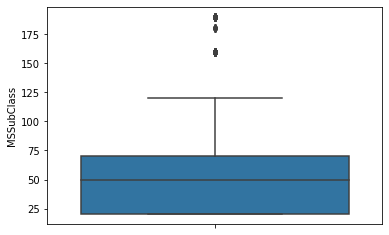

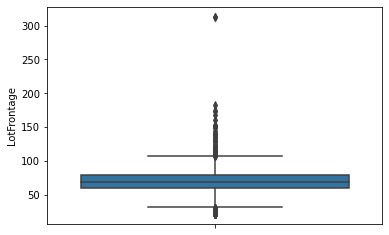

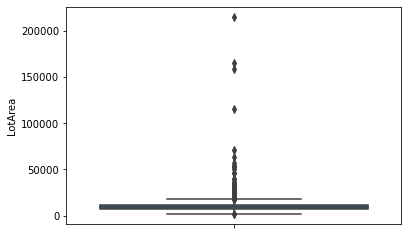

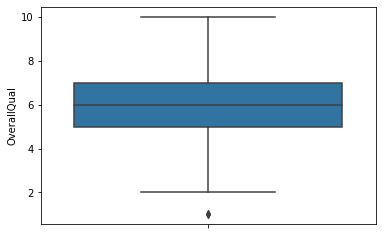

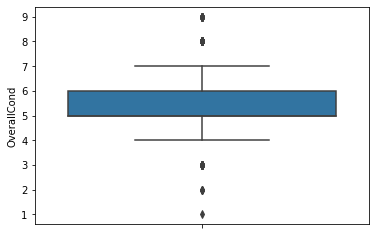

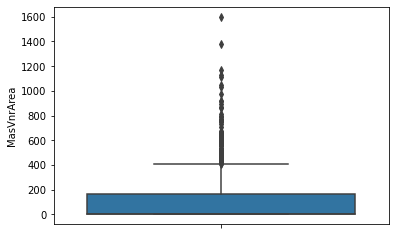

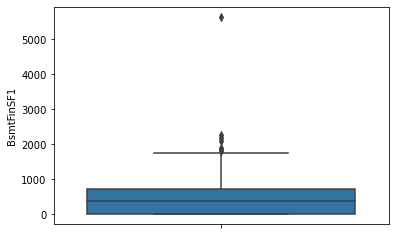

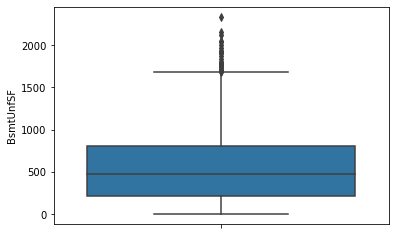

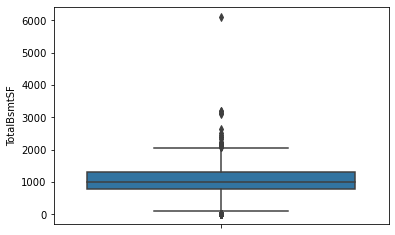

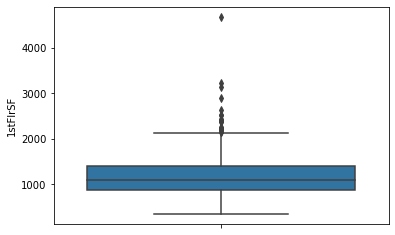

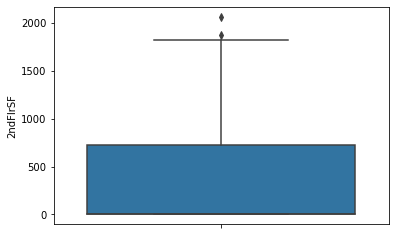

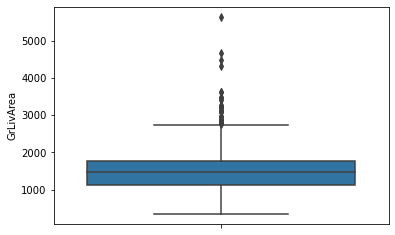

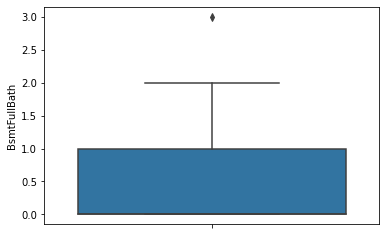

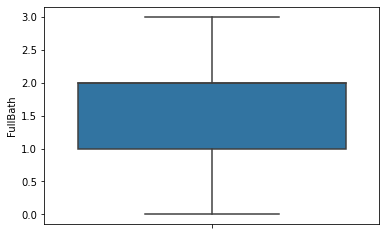

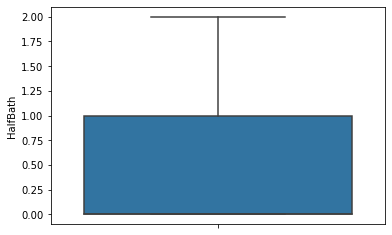

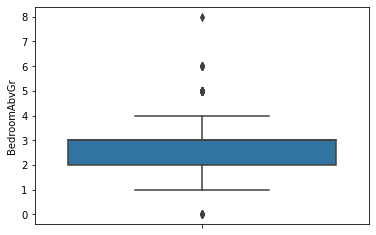

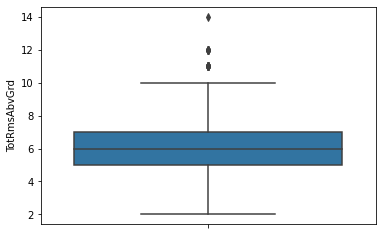

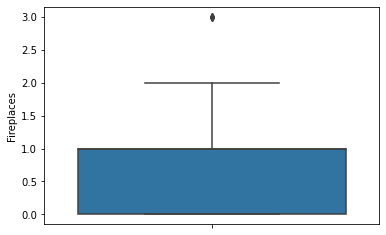

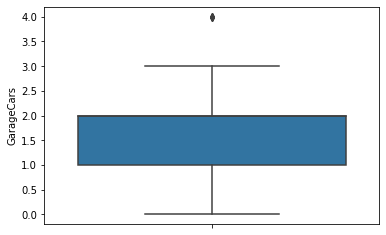

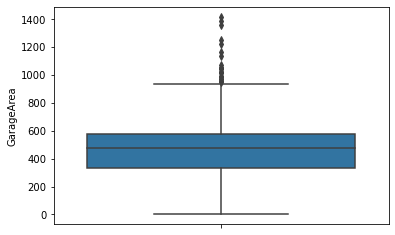

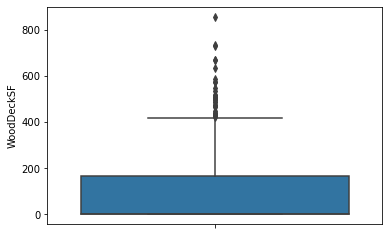

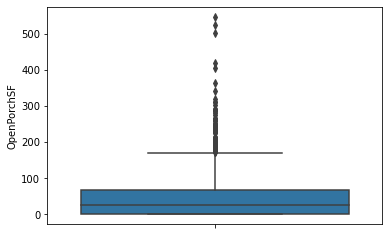

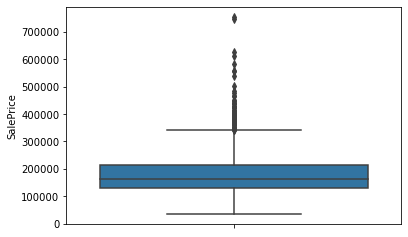

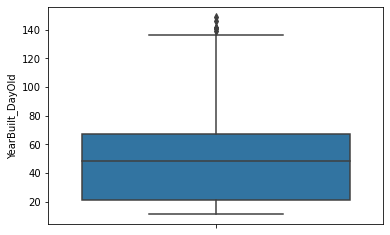

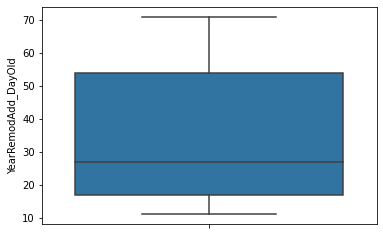

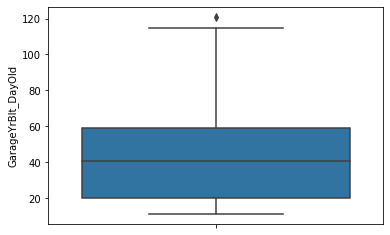

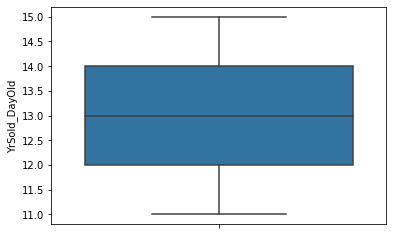

In [306]:
for i ,column in enumerate(num_col):
    numeric_analysis_outlier_check(i,column)

In [307]:
for colm in num_col:
    quan_num_col = house_price[colm].quantile(0.98)
    print(colm,' : ',quan_num_col)

MSSubClass  :  188.19999999999936
LotFrontage  :  120.81999999999994
LotArea  :  25251.619999999988
OverallQual  :  9.0
OverallCond  :  8.0
MasVnrArea  :  650.8199999999999
BsmtFinSF1  :  1442.6399999999999
BsmtUnfSF  :  1678.1999999999994
TotalBsmtSF  :  2001.6399999999999
1stFlrSF  :  2072.2799999999997
2ndFlrSF  :  1318.5599999999995
GrLivArea  :  2782.379999999999
BsmtFullBath  :  1.0
FullBath  :  3.0
HalfBath  :  1.0
BedroomAbvGr  :  4.0
TotRmsAbvGrd  :  10.819999999999936
Fireplaces  :  2.0
GarageCars  :  3.0
GarageArea  :  907.4599999999998
WoodDeckSF  :  430.0999999999997
OpenPorchSF  :  240.81999999999994
SalePrice  :  394931.06
YearBuilt_DayOld  :  112.63999999999987
YearRemodAdd_DayOld  :  71.0
GarageYrBlt_DayOld  :  101.0
YrSold_DayOld  :  15.0


In [308]:
#removing values beyond 98%
LotArea_quant = house_price['LotArea'].quantile(0.98)
house_price = house_price[house_price["LotArea"] < LotArea_quant]

MasVnrArea_quant = house_price['MasVnrArea'].quantile(0.98)
house_price = house_price[house_price["MasVnrArea"] < MasVnrArea_quant]


TotalBsmtSF_quant = house_price['TotalBsmtSF'].quantile(0.98)
house_price = house_price[house_price["TotalBsmtSF"] < TotalBsmtSF_quant]


WoodDeckSF_quant = house_price['WoodDeckSF'].quantile(0.98)
house_price = house_price[house_price["WoodDeckSF"] < WoodDeckSF_quant]


OpenPorchSF_quant = house_price['OpenPorchSF'].quantile(0.98)
house_price = house_price[house_price["OpenPorchSF"] < OpenPorchSF_quant]

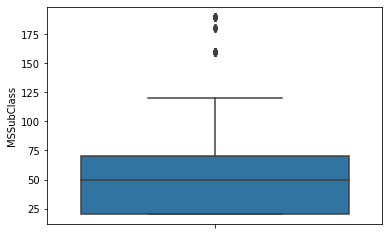

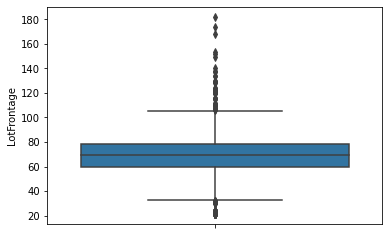

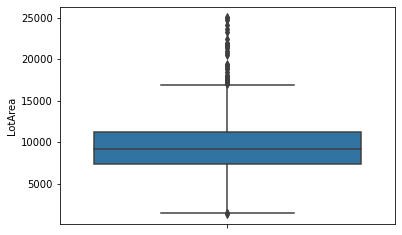

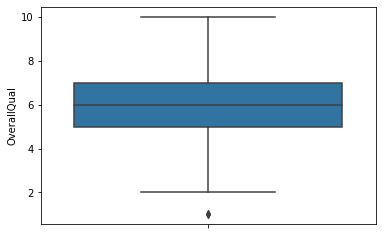

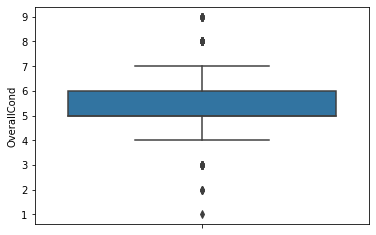

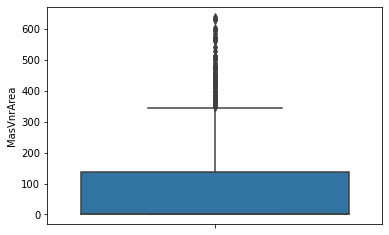

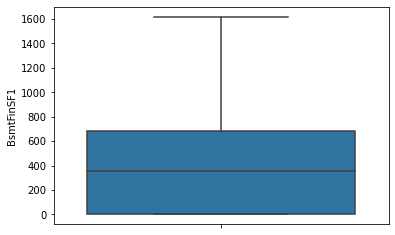

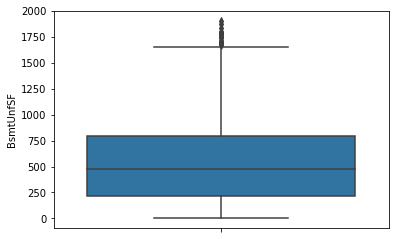

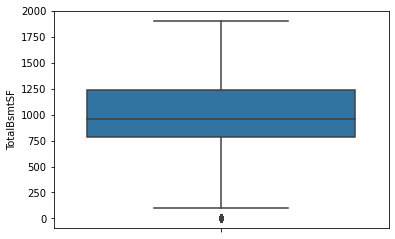

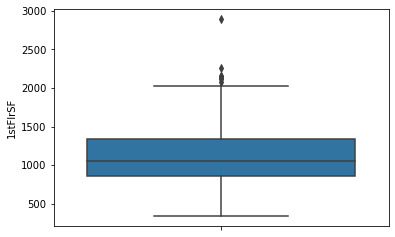

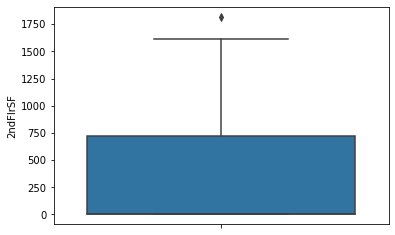

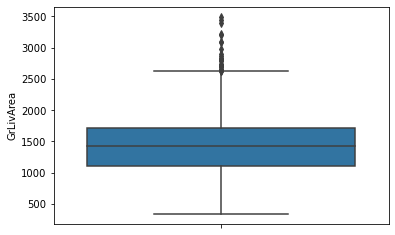

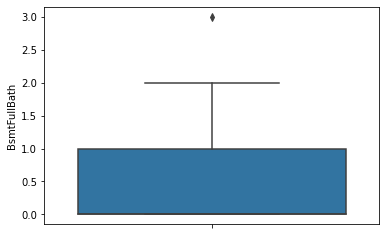

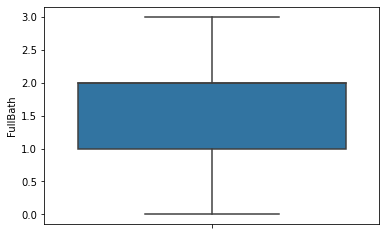

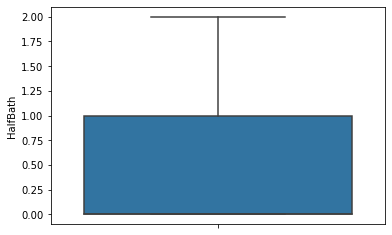

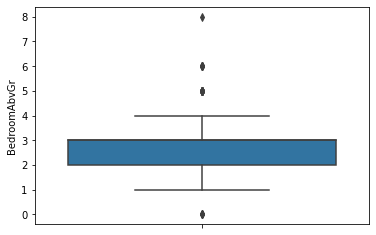

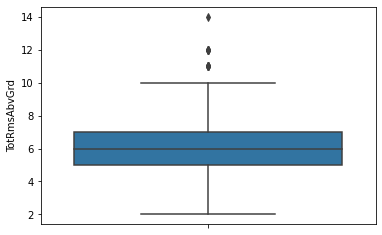

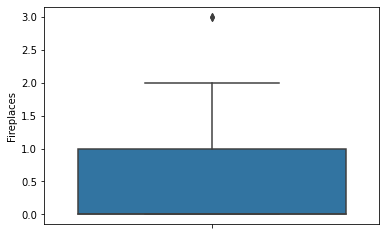

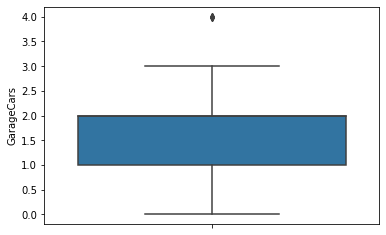

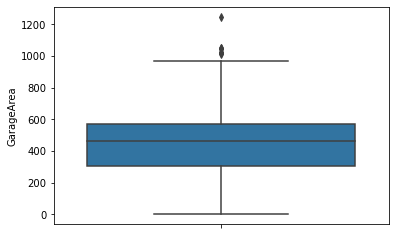

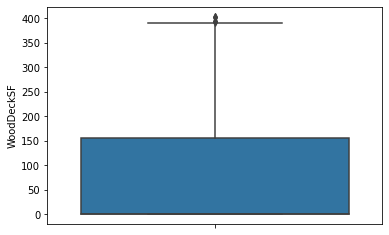

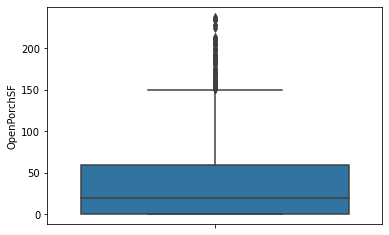

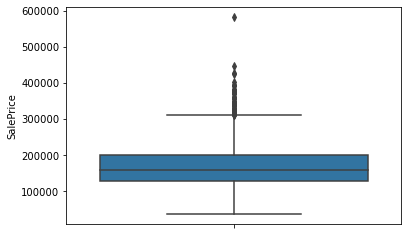

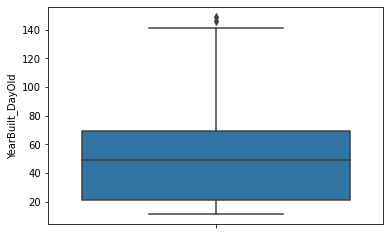

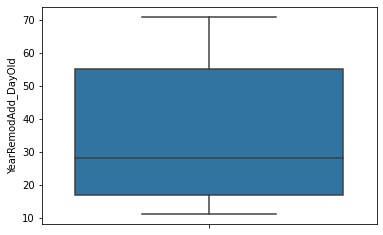

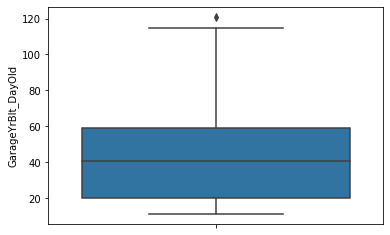

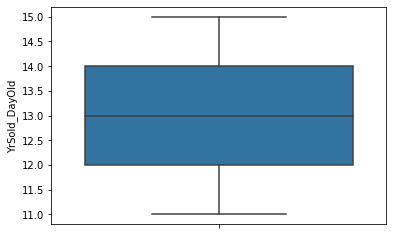

In [309]:
#After removing outliers

for i ,column in enumerate(num_col):
    numeric_analysis_outlier_check(i,column)

# Data Visualization

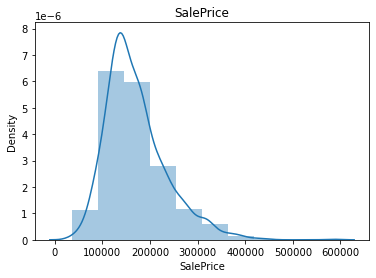

In [310]:
# plotting SalePrice column

plt.title('SalePrice')
sns.distplot(house_price['SalePrice'], bins=10)
plt.show()

we cann see ScalePrice column having more outliers from 400000

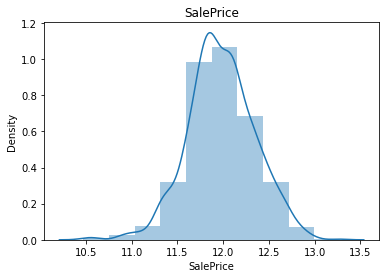

In [311]:
#removing outliers

house_price['SalePrice'] = np.log1p(house_price['SalePrice'])

#plotting graph after removing outliers

plt.title('SalePrice')
sns.distplot(house_price['SalePrice'], bins=10)
plt.show()

In [312]:
output_colm = 'SalePrice'

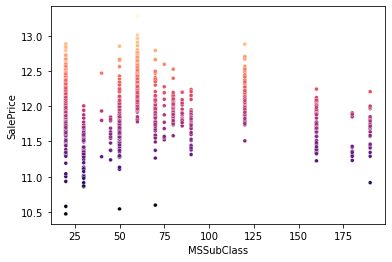

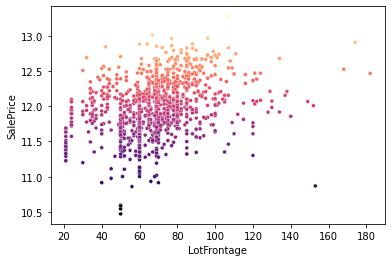

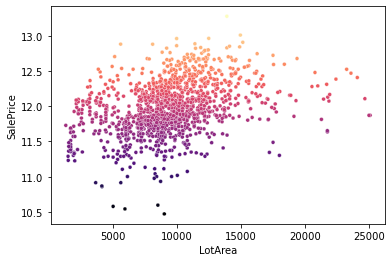

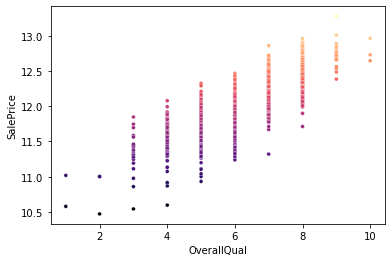

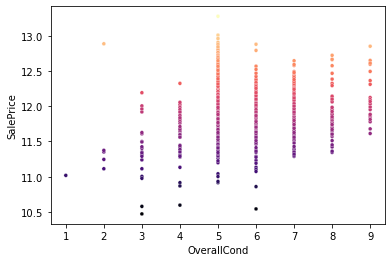

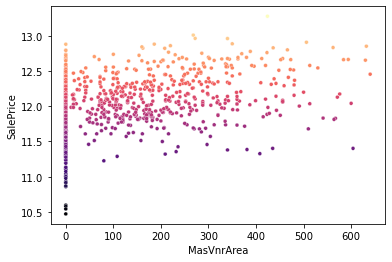

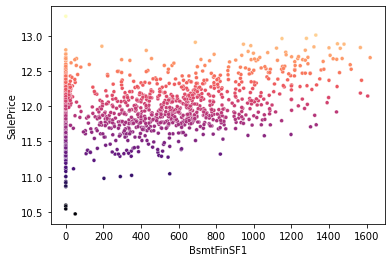

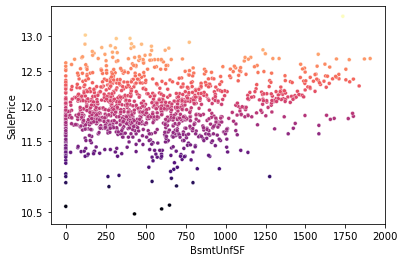

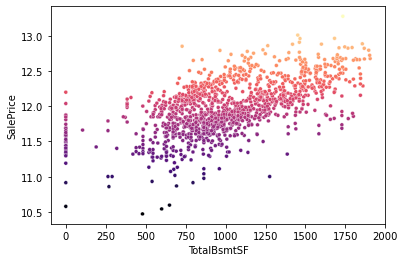

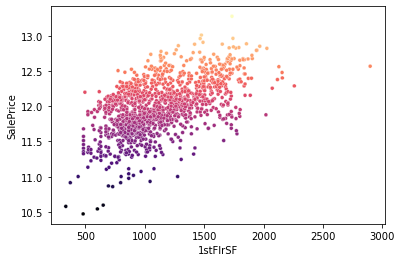

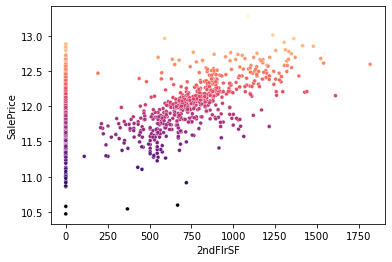

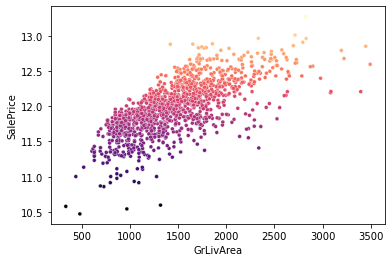

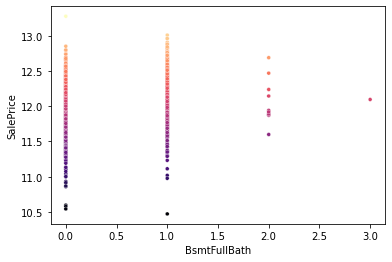

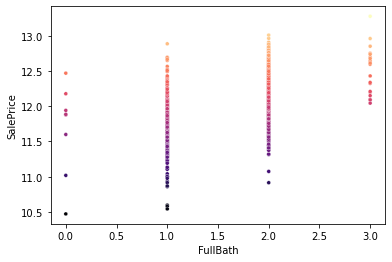

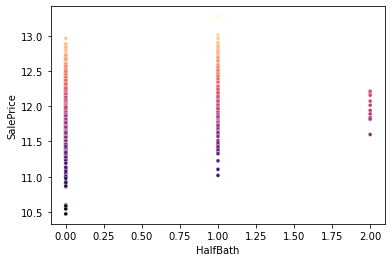

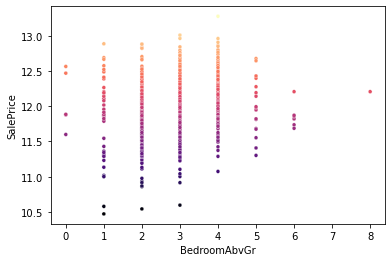

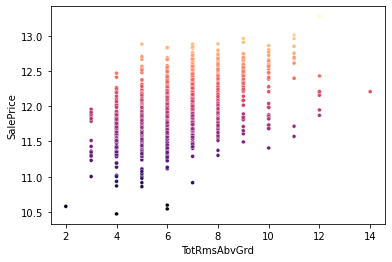

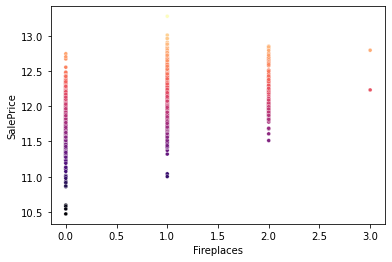

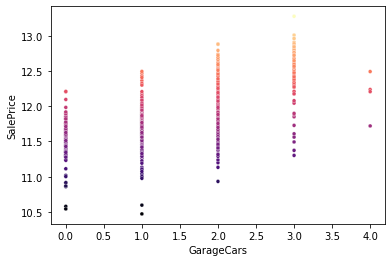

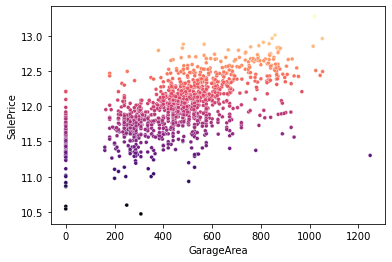

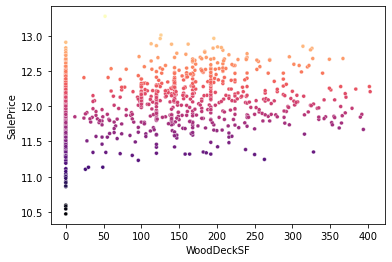

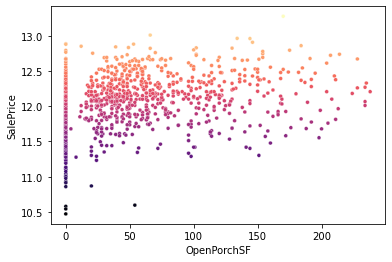

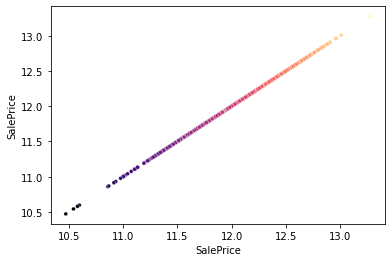

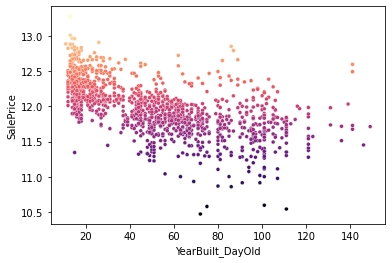

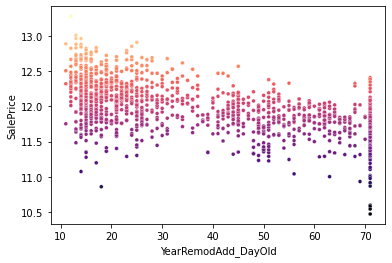

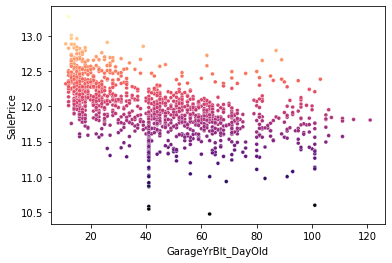

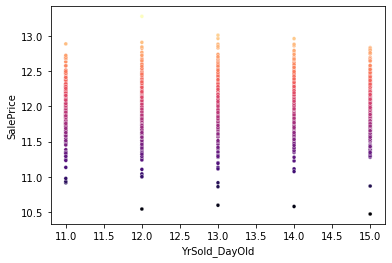

In [313]:
# plotting scatterplot for all numerical columns

for col in num_col:
    sns.scatterplot(x = col,y = output_colm,data=house_price,s=15,hue=output_colm,palette="magma", legend=False)
    plt.show()

In [314]:
# plotting boxplot for categorical columns

def categorical_analysis(i,input_col,output_col):
    plt.figure(i)
    var = house_price[[input_col]].nunique()
    plt.figure(figsize = (var,var/2))
    order_1= house_price[[input_col,output_col]].groupby(by=[input_col])[output_col].median().sort_values(ascending=True)
    sns.boxplot(x=input_col,y = output_col , data = house_price[[input_col,output_col]],order = order_1.index,palette='crest')

<Figure size 432x288 with 0 Axes>

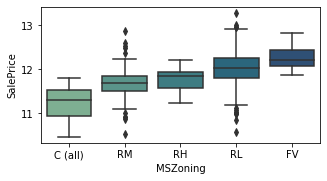

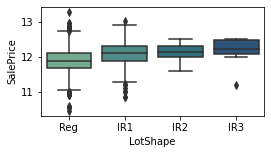

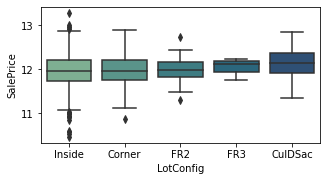

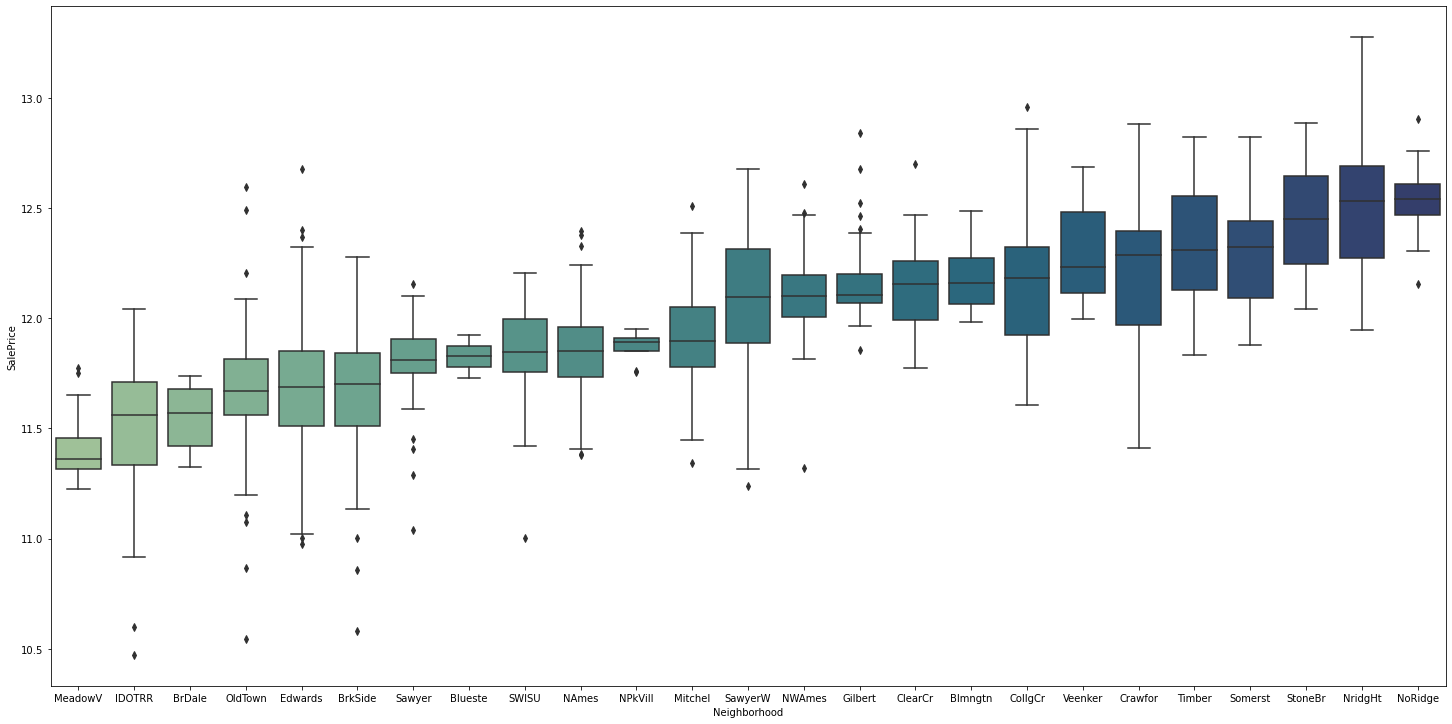

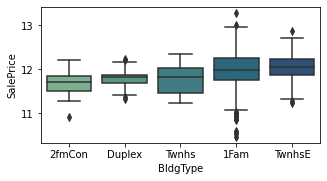

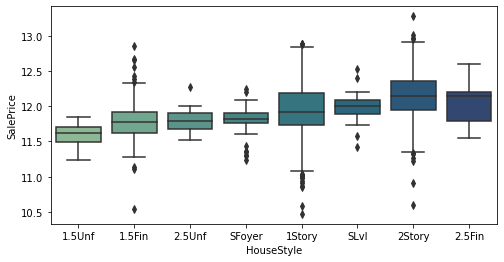

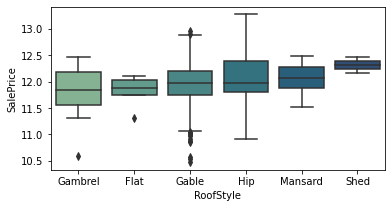

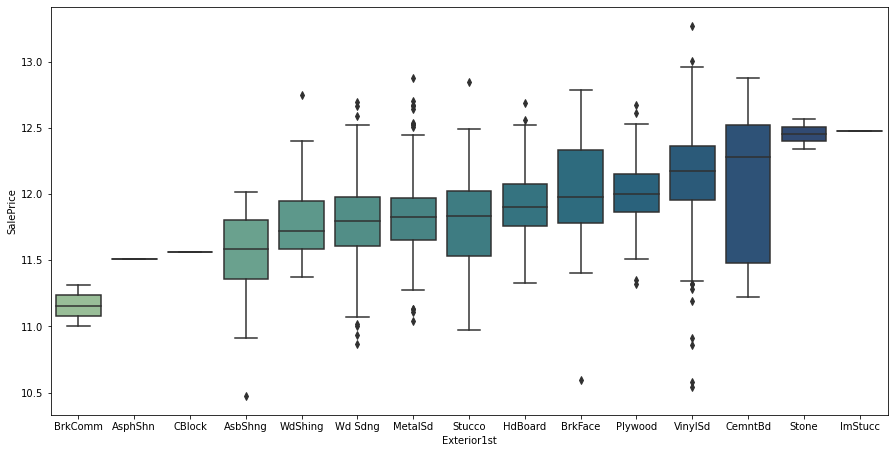

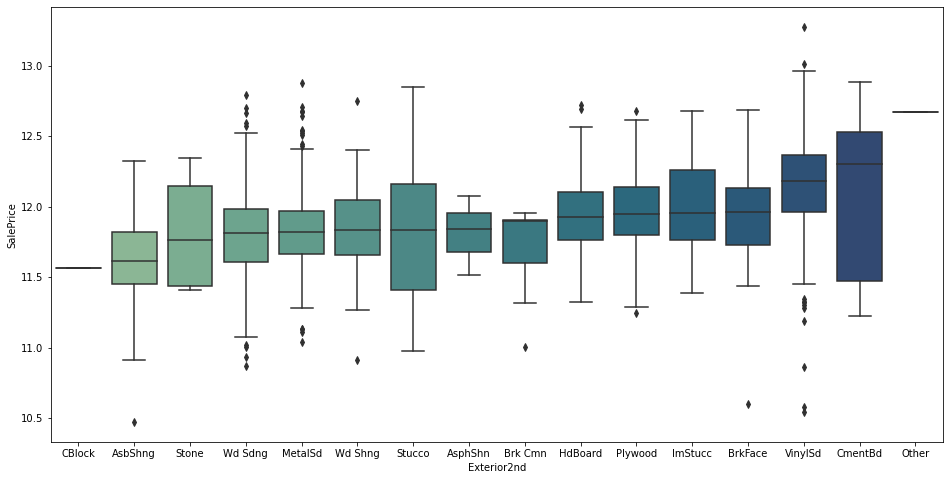

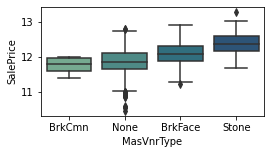

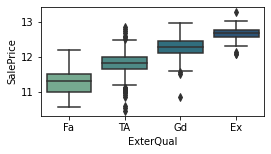

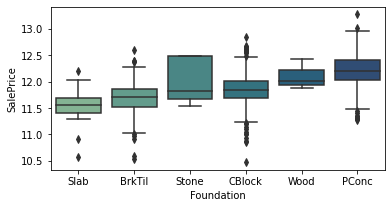

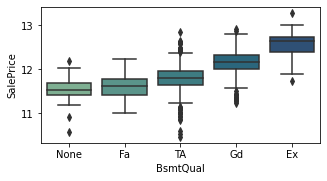

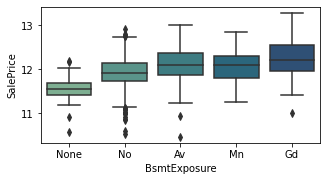

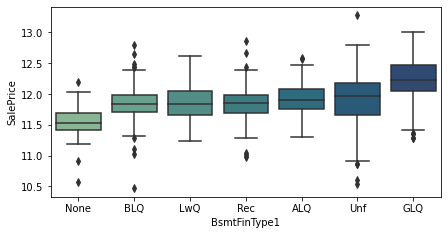

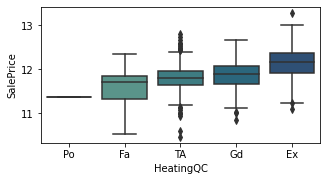

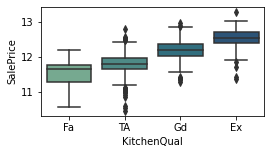

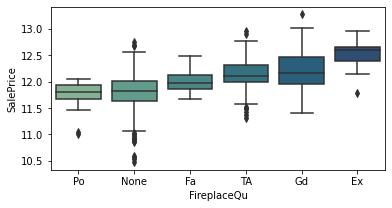

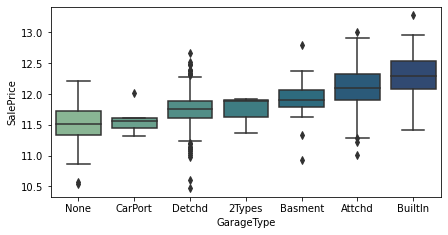

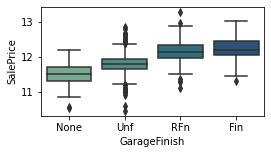

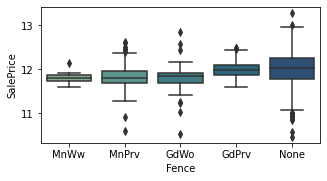

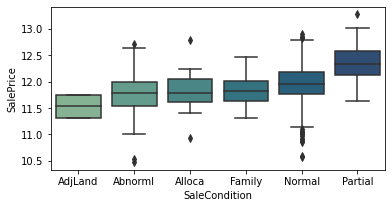

In [315]:
for i ,column in enumerate(categoric_col):
    categorical_analysis(i,column,output_colm)


<AxesSubplot:>

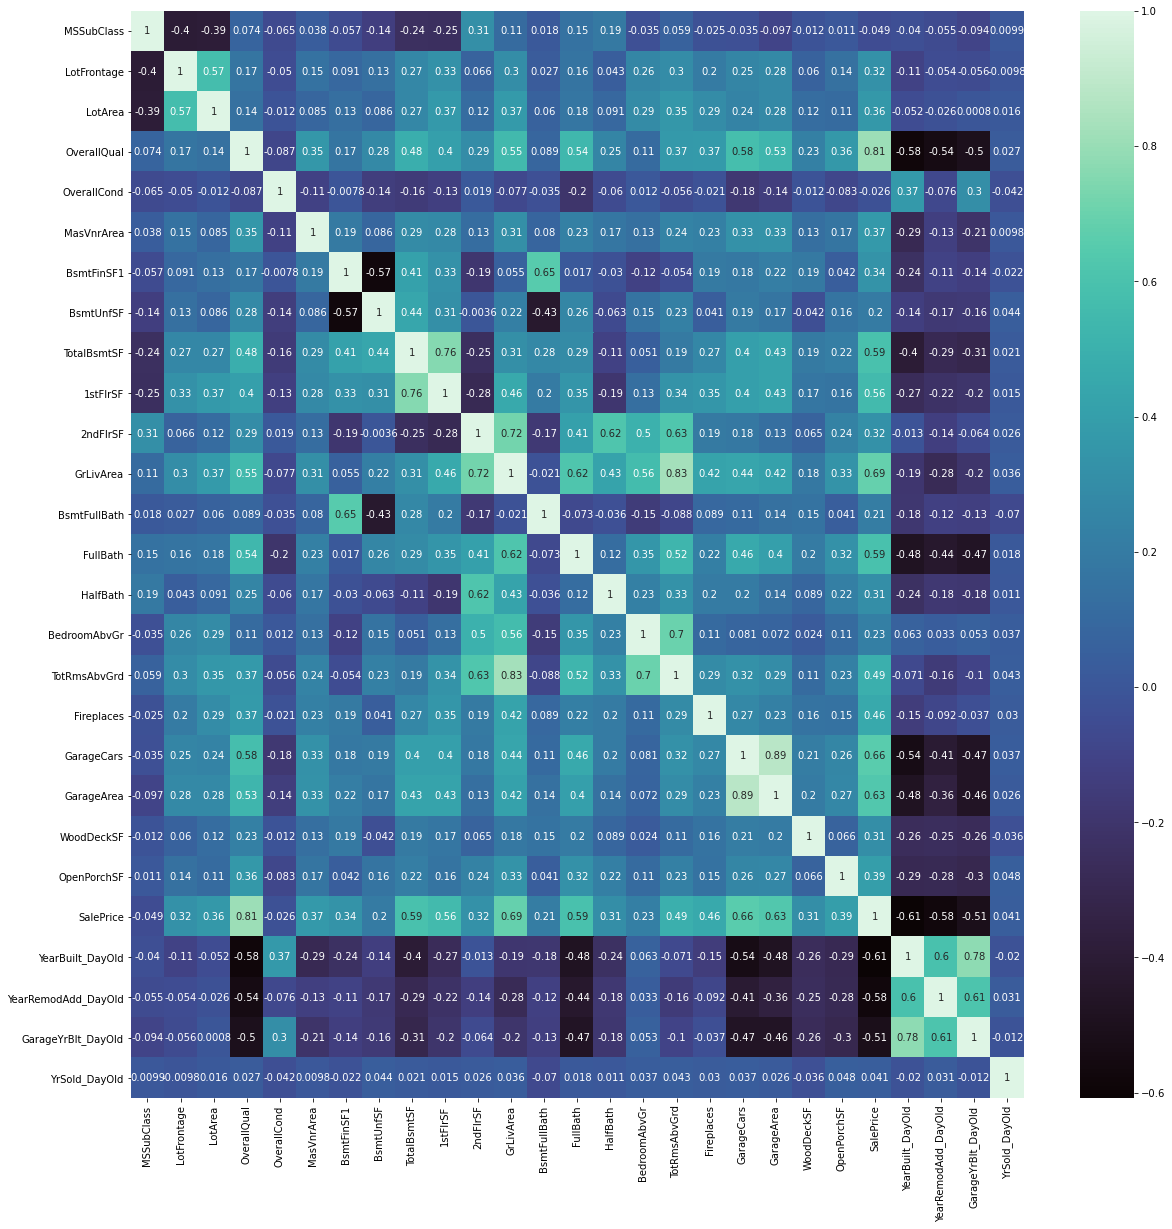

In [316]:
# checking the correlations of the house pricing

plt.figure(figsize=(20,20))

sns.heatmap(house_price.corr(),cmap='mako',annot=True)

Highly corelated columns from the heatmap are

GrLivArea and TotRmsAbvGrd - 83%

GarageCars and GarageArea - 89%

In [317]:
# removing highly corelated columns
house_price.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [318]:
house_price.shape

(1317, 47)

In [319]:
# if any null data still present
house_price.isnull().sum()

MSSubClass             0
MSZoning               0
LotFrontage            0
LotArea                0
LotShape               0
LotConfig              0
Neighborhood           0
BldgType               0
HouseStyle             0
OverallQual            0
OverallCond            0
RoofStyle              0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
Foundation             0
BsmtQual               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtUnfSF              0
TotalBsmtSF            0
HeatingQC              0
1stFlrSF               0
2ndFlrSF               0
GrLivArea              0
BsmtFullBath           0
FullBath               0
HalfBath               0
BedroomAbvGr           0
KitchenQual            0
Fireplaces             0
FireplaceQu            0
GarageType             0
GarageFinish           0
GarageCars             0
WoodDeckSF             0
OpenPorchSF            0


# Data Prepration

In [320]:
# creating categorical into numerical

house_price['LotShape'] = house_price['LotShape'].map({'Reg':3, 'IR1': 2,'IR2': 1, 'IR3': 0})
house_price['ExterQual'] = house_price['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_price['BsmtQual'] = house_price['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price['BsmtExposure'] = house_price['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_price['BsmtFinType1'] = house_price['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house_price['HeatingQC'] = house_price['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price['KitchenQual'] = house_price['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price['FireplaceQu'] = house_price['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price['GarageFinish'] = house_price['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_price['BldgType'] = house_price['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house_price['HouseStyle'] = house_price['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_price['Fence'] = house_price['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house_price['LotConfig'] = house_price['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house_price['MasVnrType'] = house_price['MasVnrType'].map({'BrkCmn': 4, 'BrkFace': 3, 'CBlock': 2, 'Stone': 1, 'None': 0 })
house_price['SaleCondition'] = house_price['SaleCondition'].map({'Normal': 6, 'Partial': 5, 'Abnorml': 4, 'Family': 3, 
                                                                   'Alloca': 2, 'AdjLand': 1, 'None': 0})
house_price.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0          60       RL         65.0     8450         3          5   
1          20       RL         80.0     9600         3          2   
2          60       RL         68.0    11250         2          5   
3          70       RL         60.0     9550         2          4   
4          60       RL         84.0    14260         2          2   

  Neighborhood  BldgType  HouseStyle  OverallQual  ...  GarageCars WoodDeckSF  \
0      CollgCr         1           4            7  ...           2          0   
1      Veenker         1           1            6  ...           2        298   
2      CollgCr         1           4            7  ...           2          0   
3      Crawfor         1           4            7  ...           3          0   
4      NoRidge         1           4            8  ...           3        192   

  OpenPorchSF Fence  SaleCondition  SalePrice  YearBuilt_DayOld  \
0          61     0              6  12.247699                18   
1           0     0              6  12.109016                45   
2          42     0              6  12.317171                20   
3          35     0              4  11.849405               106   
4          84     0              6  12.429220                21   

  YearRemodAdd_DayOld  GarageYrBlt_DayOld  YrSold_DayOld  
0                  18                  18             13  
1                  45                  45             14  
2                  19                  20             13  
3                  51                  23             15  
4                  21                  21             13  

[5 rows x 47 columns]

In [321]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1317 non-null   int64  
 1   MSZoning             1317 non-null   object 
 2   LotFrontage          1317 non-null   float64
 3   LotArea              1317 non-null   int64  
 4   LotShape             1317 non-null   int64  
 5   LotConfig            1317 non-null   int64  
 6   Neighborhood         1317 non-null   object 
 7   BldgType             1317 non-null   int64  
 8   HouseStyle           1317 non-null   int64  
 9   OverallQual          1317 non-null   int64  
 10  OverallCond          1317 non-null   int64  
 11  RoofStyle            1317 non-null   object 
 12  Exterior1st          1317 non-null   object 
 13  Exterior2nd          1317 non-null   object 
 14  MasVnrType           1317 non-null   int64  
 15  MasVnrArea           1317 non-null   f

In [322]:
house_price.shape

(1317, 47)

In [323]:
# creating dummies from categorical columns

house_price_dummy = pd.get_dummies(house_price[['MSZoning',
'Neighborhood',
'RoofStyle',
'Exterior1st',
'Exterior2nd',
'Foundation',
'GarageType'
]],drop_first=True)

In [324]:
# concatenating the dummy dataframe with original dataframe

house_price = pd.concat([house_price,house_price_dummy],axis = 'columns')

In [329]:
house_price.head()

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0          60         65.0     8450         3          5         1   
1          20         80.0     9600         3          2         1   
2          60         68.0    11250         2          5         1   
3          70         60.0     9550         2          4         1   
4          60         84.0    14260         2          2         1   

   HouseStyle  OverallQual  OverallCond  MasVnrType  ...  Foundation_PConc  \
0           4            7            5           3  ...                 1   
1           1            6            8           0  ...                 0   
2           4            7            5           3  ...                 1   
3           4            7            5           0  ...                 0   
4           4            8            5           3  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 113 columns]

In [326]:
#removing the original columns after creating dummies

house_price = house_price.drop(['MSZoning',
'Neighborhood',
'RoofStyle',
'Exterior1st',
'Exterior2nd',
'Foundation',
'GarageType'
],axis = 1)

In [330]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1458
Columns: 113 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(37), uint8(73)
memory usage: 548.0 KB


<AxesSubplot:>

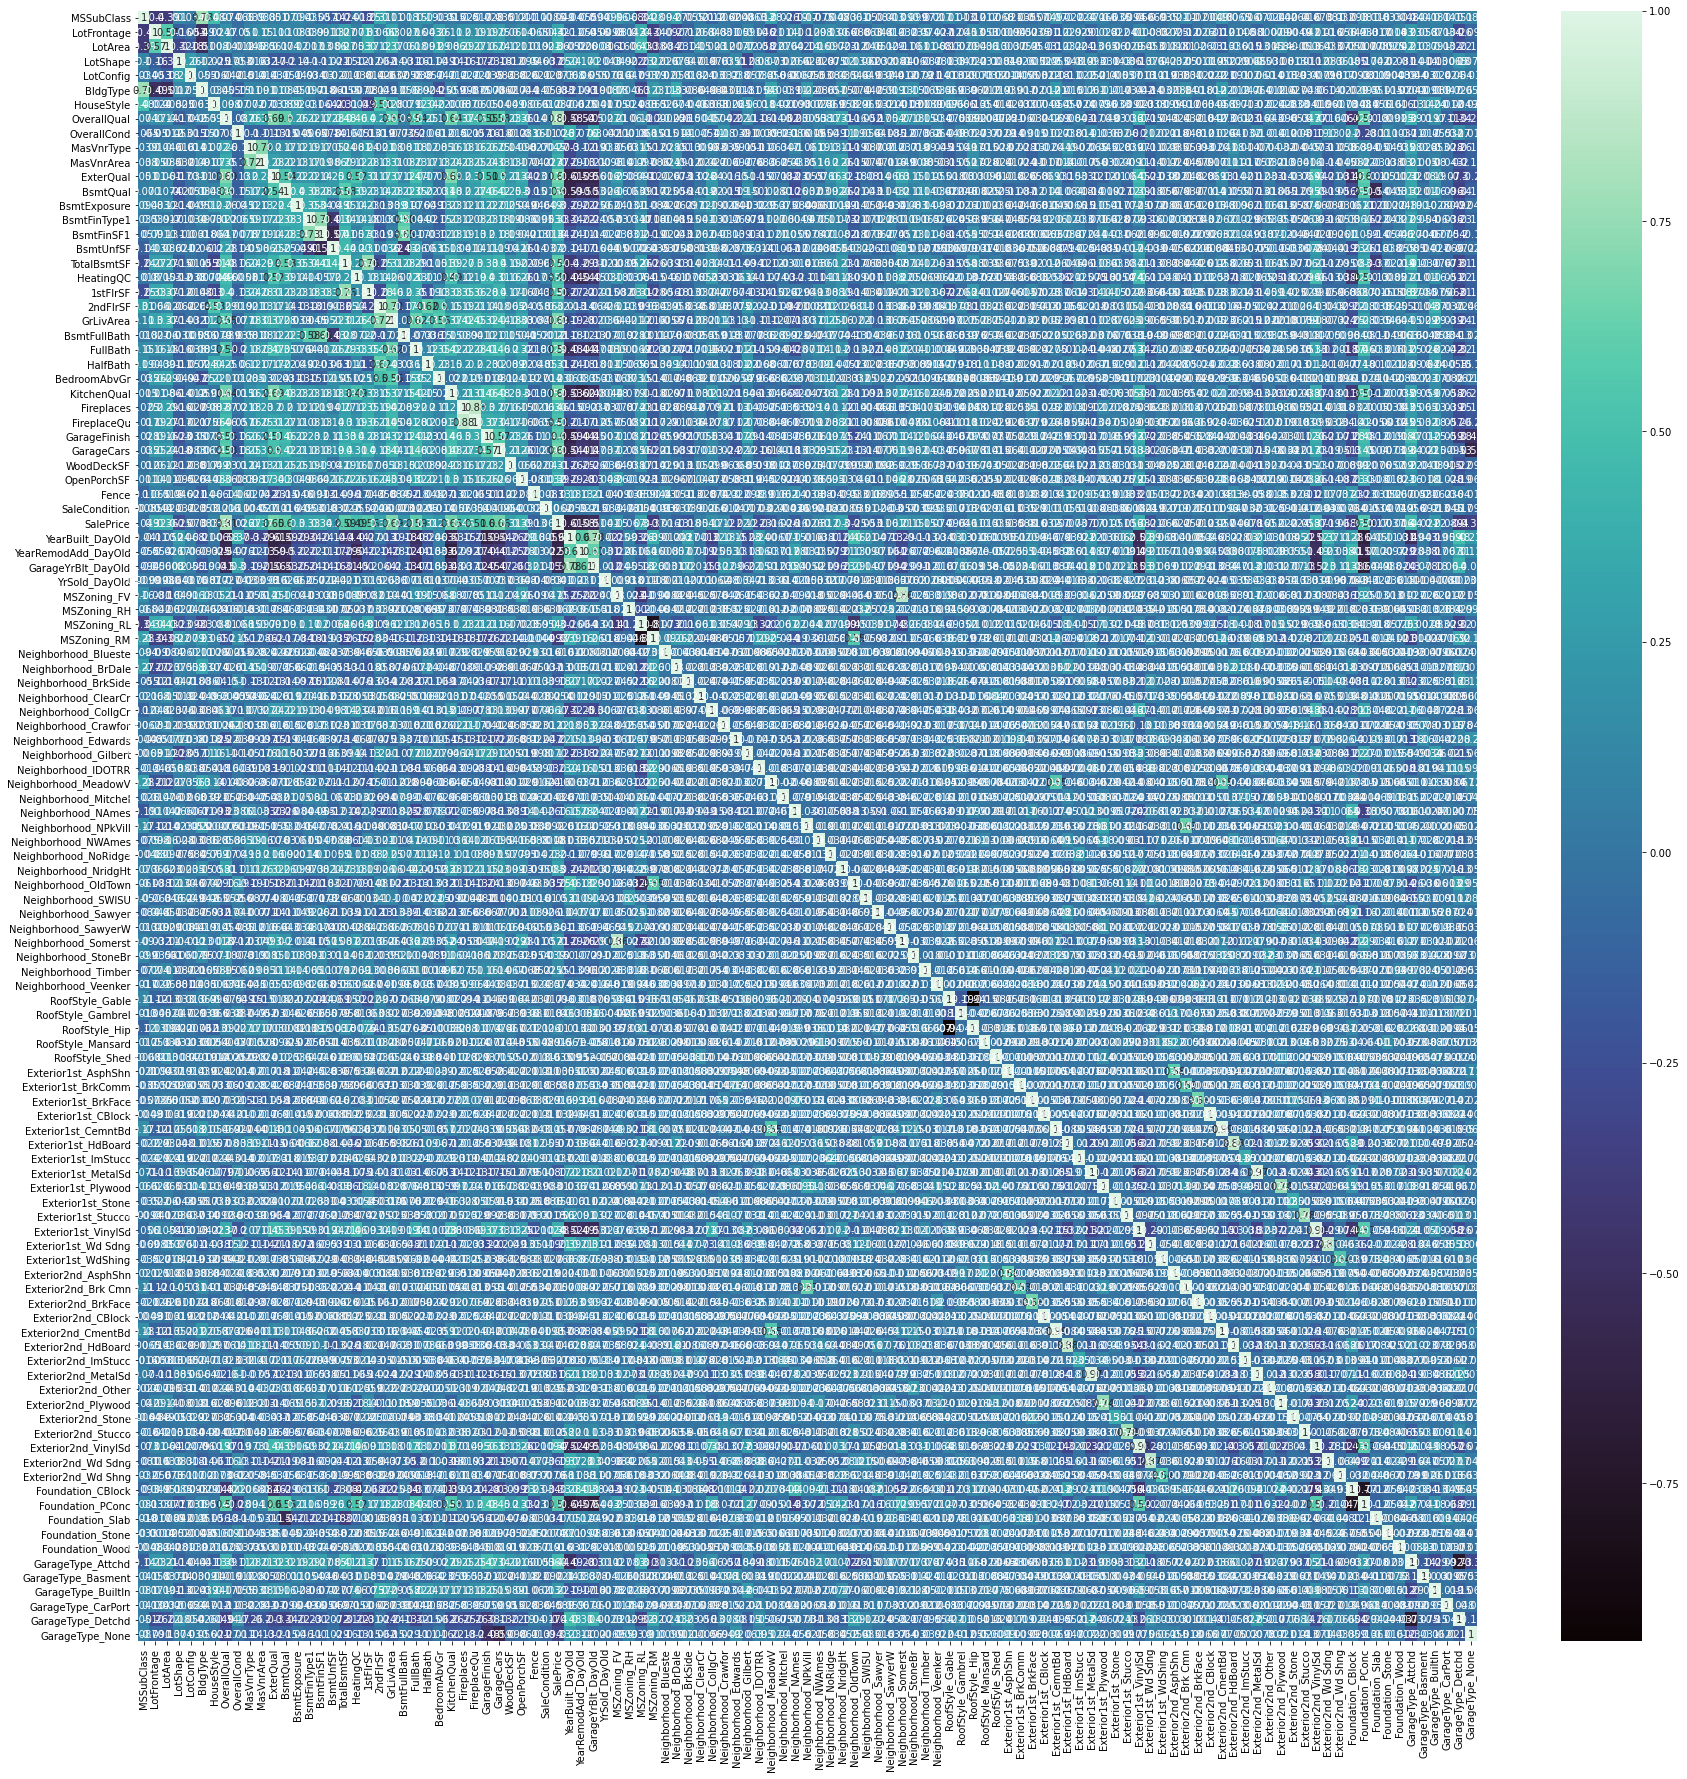

In [332]:
# checking the coefficients

plt.figure(figsize=(30,30))

sns.heatmap(house_price.corr(),cmap='mako',annot=True)

In [333]:
# dropping SalePrice

X = house_price.drop(['SalePrice'],axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0          60         65.0     8450         3          5         1   
1          20         80.0     9600         3          2         1   
2          60         68.0    11250         2          5         1   
3          70         60.0     9550         2          4         1   
4          60         84.0    14260         2          2         1   

   HouseStyle  OverallQual  OverallCond  MasVnrType  ...  Foundation_PConc  \
0           4            7            5           3  ...                 1   
1           1            6            8           0  ...                 0   
2           4            7            5           3  ...                 1   
3           4            7            5           0  ...                 0   
4           4            8            5           3  ...                 1   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
1                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
4                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
1                  0                0  
2                  0                0  
3                  1                0  
4                  0                0  

[5 rows x 112 columns]

In [334]:
#declare salesprice
Y = house_price['SalePrice']

Y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [335]:
#Scaling columns

scale_cols = X.columns

X = pd.DataFrame(scale(X))

X.columns = scale_cols

X.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrType',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=112)

In [338]:
# Creating Train and Test for X and y with size 70% and 30%

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7,test_size=0.3,random_state = 42)

# Linera regression

In [339]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [341]:
# Predicting the a train and a test

Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)

house_price_lr_metric = []

# calculating r2 square in Train and Test for Linear Regression
print("R2 Square - Linear Regression")
r2_train_lr = r2_score(Y_train, Y_pred_train)
print("Train : ",r2_train_lr)
house_price_lr_metric.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, Y_pred_test)
print("Test : ",r2_test_lr)
house_price_lr_metric.append(r2_test_lr)

print( )

#Calculating Residual Sum Of Square (RSS) of Train and Test for Linear Regression

print("Residual Sum Of Square (RSS) - Linear Regression")
rss_train_lr = np.sum(np.square(Y_train - Y_pred_train))
print("Train : ",rss_train_lr)
house_price_lr_metric.append(rss_train_lr)

rss_test_lr = np.sum(np.square(Y_test - Y_pred_test))
print("Test : ",rss_test_lr)
house_price_lr_metric.append(rss_test_lr)

print( )

# Calculating Mean Squared Error(MSE) of Train and Tes for Linear Regression

print("Mean Squared Error (MSE) - Linear Regression")
mse_train_lr = mean_squared_error(Y_train, Y_pred_train)
print("Train : ",mse_train_lr)
house_price_lr_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, Y_pred_test)
print("Test : ",mse_test_lr)
house_price_lr_metric.append(mse_test_lr**0.5)

R2 Square - Linear Regression
Train :  0.9203497390097723
Test :  0.8969582466035932

Residual Sum Of Square (RSS) - Linear Regression
Train :  9.742848308691977
Test :  5.617074580045696

Mean Squared Error (MSE) - Linear Regression
Train :  0.010578554081098781
Test :  0.01418453176779216


In [342]:
print(lm.coef_)

[ 2.53651762e-03  7.96639158e-03  1.91742838e-02 -4.87553364e-05
  7.86772257e-03 -2.91859886e-02  2.33909276e-03  6.42528923e-02
  4.45663801e-02 -2.95696765e-03  4.63945034e-04 -6.13777448e-03
  6.74667340e-03  1.65848479e-02  1.17084586e-03  2.34560452e-02
 -1.59051166e-02  5.83402573e-02  1.33268473e-02 -1.76542040e-02
 -2.37986166e-02  1.30562443e-01  2.75673024e-03  1.42119641e-02
  1.71972385e-02  1.52478518e-03  8.40544936e-03  9.69222607e-03
  5.31604817e-03  1.33243638e-02  2.65614981e-02  6.32249024e-03
  2.78334478e-03 -1.56703978e-03  8.14484383e-03 -5.66105578e-02
 -1.69101770e-02 -1.87694988e-02  9.00144221e-03  9.29167240e-02
  4.66288483e-02  1.89685198e-01  1.49465830e-01  1.35485006e-03
 -4.91879414e-03  4.04438418e-03 -4.91734490e-03 -1.26401530e-02
  1.77905829e-02 -2.00271433e-02 -2.23185838e-02  3.66370633e-03
 -1.04489876e-02 -1.43703905e-02 -1.95705822e-02  4.66041966e-04
 -1.78581168e-02 -2.26147049e-03  1.00026773e-02 -1.04731926e-02
 -2.54731645e-03 -1.80509

# RFE

In [343]:
#running RFE for 50 columns

rfe = RFE(lm,50)

rfe = rfe.fit(X_train, Y_train)

In [344]:
# Assigning the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assigning the 50 features selected using RFE to a dataframe

house_price_temp = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
house_price_temp = house_price_temp.loc[house_price_temp['rfe_support'] == True]
house_price_temp.reset_index(drop=True, inplace=True)

house_price_temp

Variable  rfe_support  rfe_ranking
0                LotArea         True            1
1               BldgType         True            1
2            OverallQual         True            1
3            OverallCond         True            1
4           BsmtExposure         True            1
5             BsmtFinSF1         True            1
6              BsmtUnfSF         True            1
7            TotalBsmtSF         True            1
8              HeatingQC         True            1
9              GrLivArea         True            1
10              HalfBath         True            1
11           KitchenQual         True            1
12           FireplaceQu         True            1
13          GarageFinish         True            1
14            GarageCars         True            1
15         SaleCondition         True            1
16      YearBuilt_DayOld         True            1
17   YearRemodAdd_DayOld         True            1
18    GarageYrBlt_DayOld         True            1
19           MSZoning_FV         True            1
20           MSZoning_RH         True            1
21           MSZoning_RL         True            1
22           MSZoning_RM         True            1
23  Neighborhood_BrkSide         True            1
24  Neighborhood_Crawfor         True            1
25  Neighborhood_Edwards         True            1
26  Neighborhood_MeadowV         True            1
27  Neighborhood_Mitchel         True            1
28   Neighborhood_NWAmes         True            1
29  Neighborhood_NridgHt         True            1
30  Neighborhood_OldTown         True            1
31   Neighborhood_Sawyer         True            1
32  Neighborhood_Somerst         True            1
33  Neighborhood_StoneBr         True            1
34       RoofStyle_Gable         True            1
35     RoofStyle_Gambrel         True            1
36         RoofStyle_Hip         True            1
37        RoofStyle_Shed         True            1
38   Exterior1st_BrkComm         True            1
39   Exterior1st_BrkFace         True            1
40   Exterior1st_Wd Sdng         True            1
41   Exterior2nd_MetalSd         True            1
42   Exterior2nd_Wd Sdng         True            1
43     Foundation_CBlock         True            1
44      Foundation_PConc         True            1
45       Foundation_Slab         True            1
46     GarageType_Attchd         True            1
47    GarageType_Basment         True            1
48    GarageType_BuiltIn         True            1
49     GarageType_Detchd         True            1

In [345]:
X_train_rfe = X_train[col] #assigning 50 colmns

In [346]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]   ## linked the 50 new colmns to train and test

In [347]:
X_train.columns

Index(['LotArea', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'HalfBath', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'SaleCondition', 'YearBuilt_DayOld', 'YearRemodAdd_DayOld',
       'GarageYrBlt_DayOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'GarageType_Attchd', 'GarageType_Basmen

In [348]:
X_test.columns

Index(['LotArea', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'HalfBath', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'SaleCondition', 'YearBuilt_DayOld', 'YearRemodAdd_DayOld',
       'GarageYrBlt_DayOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'GarageType_Attchd', 'GarageType_Basmen

# Ridge Regression

In [349]:
# list of alphas for Ridge

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Loading Ridge

ridge = Ridge()

# cross validation with fold 5 

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
# Fitting the Ridge model cv with X train and Y train 
ridge_model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [350]:
print(ridge_model_cv.best_estimator_)

Ridge(alpha=4.0)


In [351]:
#  mean score of train and test in ridge

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
15         4.0         -0.073545        -0.080771                1
14         3.0         -0.073496        -0.080776                2
13         2.0         -0.073464        -0.080783                3
12         1.0         -0.073441        -0.080790                4
11         0.9         -0.073439        -0.080791                5
10         0.8         -0.073437        -0.080791                6
9          0.7         -0.073436        -0.080792                7
8          0.6         -0.073434        -0.080792                8
7          0.5         -0.073432        -0.080792                9
6          0.4         -0.073431        -0.080794               10
5          0.3         -0.073429        -0.080795               11
4          0.2         -0.073427        -0.080797               12
3          0.1         -0.073425        -0.080799               13
2         0.01         -0.073424        -0.080801               14
1        0.001         -0.073424        -0.080801               15
0       0.0001         -0.073423        -0.080801               16
16         5.0         -0.073598        -0.080803               17
17         6.0         -0.073651        -0.080834               18
18         7.0         -0.073701        -0.080860               19
19         8.0         -0.073752        -0.080883               20
20         9.0         -0.073801        -0.080906               21
21        10.0         -0.073852        -0.080926               22
22          20         -0.074321        -0.081201               23
23          50         -0.075297        -0.081702               24
24         100         -0.076704        -0.082740               25
25         500         -0.087478        -0.091624               26

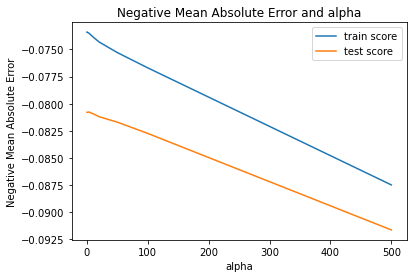

In [352]:
# plotting mean test and train scoes with alpha = 4

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')


plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [353]:
# best estimator fo rlambda
ridge_model_cv.best_params_

{'alpha': 4.0}

In [355]:
# chekcing the coefficients with lambda = 4

alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
ridge.coef_

array([ 0.02141896, -0.02233821,  0.07109857,  0.04472343,  0.0193251 ,
        0.02557464, -0.01506442,  0.05746539,  0.01395846,  0.1161656 ,
        0.0103814 ,  0.01285349,  0.01479451,  0.00858202,  0.03260043,
        0.01140927, -0.05503724, -0.01799802, -0.01069343,  0.06227624,
        0.03319691,  0.12933047,  0.1022695 ,  0.00988884,  0.02339859,
       -0.00857689, -0.00808369, -0.00726541, -0.00559869,  0.01627841,
       -0.00501913, -0.00519715,  0.02155795,  0.01465597, -0.02555603,
       -0.00966218, -0.02485525, -0.00878623, -0.02168559,  0.0110991 ,
       -0.01474653,  0.00685009,  0.0134235 ,  0.01836198,  0.03280384,
        0.01370535,  0.02820126,  0.00699445,  0.01398916,  0.01879625])

In [356]:
print(ridge.coef_)

[ 0.02141896 -0.02233821  0.07109857  0.04472343  0.0193251   0.02557464
 -0.01506442  0.05746539  0.01395846  0.1161656   0.0103814   0.01285349
  0.01479451  0.00858202  0.03260043  0.01140927 -0.05503724 -0.01799802
 -0.01069343  0.06227624  0.03319691  0.12933047  0.1022695   0.00988884
  0.02339859 -0.00857689 -0.00808369 -0.00726541 -0.00559869  0.01627841
 -0.00501913 -0.00519715  0.02155795  0.01465597 -0.02555603 -0.00966218
 -0.02485525 -0.00878623 -0.02168559  0.0110991  -0.01474653  0.00685009
  0.0134235   0.01836198  0.03280384  0.01370535  0.02820126  0.00699445
  0.01398916  0.01879625]


In [357]:
    # putting the features and coefficient in a dataframe

house_price_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_price_ridge.reset_index(drop=True, inplace=True)
house_price_ridge

Features  Coefficient
0                LotArea       0.0214
1               BldgType      -0.0223
2            OverallQual       0.0711
3            OverallCond       0.0447
4           BsmtExposure       0.0193
5             BsmtFinSF1       0.0256
6              BsmtUnfSF      -0.0151
7            TotalBsmtSF       0.0575
8              HeatingQC       0.0140
9              GrLivArea       0.1162
10              HalfBath       0.0104
11           KitchenQual       0.0129
12           FireplaceQu       0.0148
13          GarageFinish       0.0086
14            GarageCars       0.0326
15         SaleCondition       0.0114
16      YearBuilt_DayOld      -0.0550
17   YearRemodAdd_DayOld      -0.0180
18    GarageYrBlt_DayOld      -0.0107
19           MSZoning_FV       0.0623
20           MSZoning_RH       0.0332
21           MSZoning_RL       0.1293
22           MSZoning_RM       0.1023
23  Neighborhood_BrkSide       0.0099
24  Neighborhood_Crawfor       0.0234
25  Neighborhood_Edwards      -0.0086
26  Neighborhood_MeadowV      -0.0081
27  Neighborhood_Mitchel      -0.0073
28   Neighborhood_NWAmes      -0.0056
29  Neighborhood_NridgHt       0.0163
30  Neighborhood_OldTown      -0.0050
31   Neighborhood_Sawyer      -0.0052
32  Neighborhood_Somerst       0.0216
33  Neighborhood_StoneBr       0.0147
34       RoofStyle_Gable      -0.0256
35     RoofStyle_Gambrel      -0.0097
36         RoofStyle_Hip      -0.0249
37        RoofStyle_Shed      -0.0088
38   Exterior1st_BrkComm      -0.0217
39   Exterior1st_BrkFace       0.0111
40   Exterior1st_Wd Sdng      -0.0147
41   Exterior2nd_MetalSd       0.0069
42   Exterior2nd_Wd Sdng       0.0134
43     Foundation_CBlock       0.0184
44      Foundation_PConc       0.0328
45       Foundation_Slab       0.0137
46     GarageType_Attchd       0.0282
47    GarageType_Basment       0.0070
48    GarageType_BuiltIn       0.0140
49     GarageType_Detchd       0.0188

In [358]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(5), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.02142,
 'BldgType': -0.02234,
 'OverallQual': 0.0711,
 'OverallCond': 0.04472,
 'BsmtExposure': 0.01933,
 'BsmtFinSF1': 0.02557,
 'BsmtUnfSF': -0.01506,
 'TotalBsmtSF': 0.05747,
 'HeatingQC': 0.01396,
 'GrLivArea': 0.11617,
 'HalfBath': 0.01038,
 'KitchenQual': 0.01285,
 'FireplaceQu': 0.01479,
 'GarageFinish': 0.00858,
 'GarageCars': 0.0326,
 'SaleCondition': 0.01141,
 'YearBuilt_DayOld': -0.05504,
 'YearRemodAdd_DayOld': -0.018,
 'GarageYrBlt_DayOld': -0.01069,
 'MSZoning_FV': 0.06228,
 'MSZoning_RH': 0.0332,
 'MSZoning_RL': 0.12933,
 'MSZoning_RM': 0.10227,
 'Neighborhood_BrkSide': 0.00989,
 'Neighborhood_Crawfor': 0.0234,
 'Neighborhood_Edwards': -0.00858,
 'Neighborhood_MeadowV': -0.00808,
 'Neighborhood_Mitchel': -0.00727,
 'Neighborhood_NWAmes': -0.0056,
 'Neighborhood_NridgHt': 0.01628,
 'Neighborhood_OldTown': -0.00502,
 'Neighborhood_Sawyer': -0.0052,
 'Neighborhood_Somerst': 0.02156,
 'Neighborhood_StoneBr': 0.01466,
 'RoofStyle_Gable': -0.02556,
 'RoofStyle_Ga

In [359]:
# Doing a RFE to minimise the features to 15
X_train_ridge = X_train[house_price_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, Y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, Y_train)

In [360]:
# Creatinf function to gety coefficient value

def ridge_find_coefficient(x):
    return ridge_coeff_dict[x]

# Assign top 15 features to a temp dataframe for further display in the bar plot

house_price_ridge = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
house_price_ridge = house_price_ridge.loc[house_price_ridge['rfe_support'] == True]
house_price_ridge.reset_index(drop=True, inplace=True)

house_price_ridge['Coefficient'] = house_price_ridge['Features'].apply(ridge_find_coefficient)
house_price_ridge = house_price_ridge.sort_values(by=['Coefficient'], ascending=False)
house_price_ridge = house_price_ridge.head(15)
house_price_ridge

Features  rfe_support  rfe_ranking  Coefficient
10           MSZoning_RL         True            1      0.12933
5              GrLivArea         True            1      0.11617
11           MSZoning_RM         True            1      0.10227
1            OverallQual         True            1      0.07110
8            MSZoning_FV         True            1      0.06228
4            TotalBsmtSF         True            1      0.05747
2            OverallCond         True            1      0.04472
9            MSZoning_RH         True            1      0.03320
14      Foundation_PConc         True            1      0.03280
6             GarageCars         True            1      0.03260
12  Neighborhood_Crawfor         True            1      0.02340
3              BsmtUnfSF         True            1     -0.01506
13   Exterior1st_BrkComm         True            1     -0.02169
0               BldgType         True            1     -0.02234
7       YearBuilt_DayOld         True            1     -0.05504

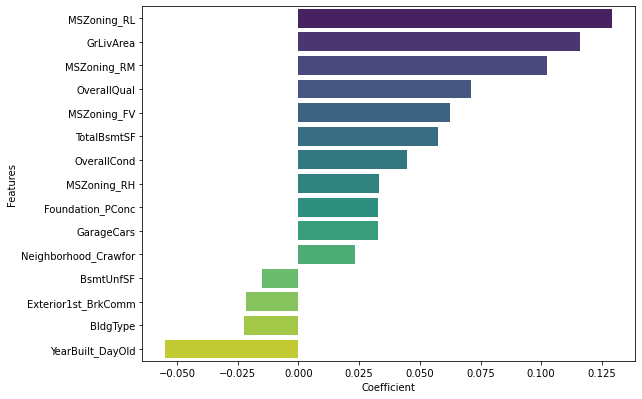

In [361]:
# Plotting the blot plot to determine the variables that would affect pricing of the house based on ridge Regression

plt.figure(figsize = (30,30))

plt.subplot(4,3,1)

sns.barplot(x='Coefficient' , y = 'Features' , palette='viridis',data = house_price_ridge)

plt.show()

In [364]:
# Predicting the X train and X test in ridge

Y_pred_train = ridge.predict(X_train)
Y_pred_test = ridge.predict(X_test)

house_price_ridge_metric = []

# calculating r2 square in Train and Test for Ridge Regression
print("R2 Square - Ridge Regression")
r2_train_ridge = r2_score(Y_train, Y_pred_train)
print("Train : ",r2_train_ridge)
house_price_ridge_metric.append(r2_train_ridge)

r2_test_ridge = r2_score(Y_test, Y_pred_test)
print("Test : ",r2_test_ridge)
house_price_ridge_metric.append(r2_test_ridge)

print( )

#Calculating Residual Sum Of Square (RSS) of Train and Test for Ridge Regression

print("Residual Sum Of Square (RSS) - Ridge Regression")
rss_train_ridge = np.sum(np.square(Y_train - Y_pred_train))
print("Train : ",rss_train_ridge)
house_price_ridge_metric.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(Y_test - Y_pred_test))
print("Test : ",rss_test_ridge)
house_price_ridge_metric.append(rss_test_ridge)

print( )

# Calculating Mean Squared Error(MSE) of Train and Test for Ridge Regression

print("Mean Squared Error (MSE) - Ridge Regression")
mse_train_ridge = mean_squared_error(Y_train, Y_pred_train)
print("Train : ",mse_train_ridge)
house_price_ridge_metric.append(mse_train_ridge)

mse_test_ridge = mean_squared_error(Y_test, Y_pred_test)
print("Test : ",mse_test_ridge)
house_price_ridge_metric.append(mse_test_ridge)

R2 Square - Ridge Regression
Train :  0.9188746345333955
Test :  0.9015008641626352

Residual Sum Of Square (RSS) - Ridge Regression
Train :  9.92328361391434
Test :  5.369444655508196

Mean Squared Error (MSE) - Ridge Regression
Train :  0.010774466464619261
Test :  0.013559203675525747


Text(0, 0.5, 'Sales Price')

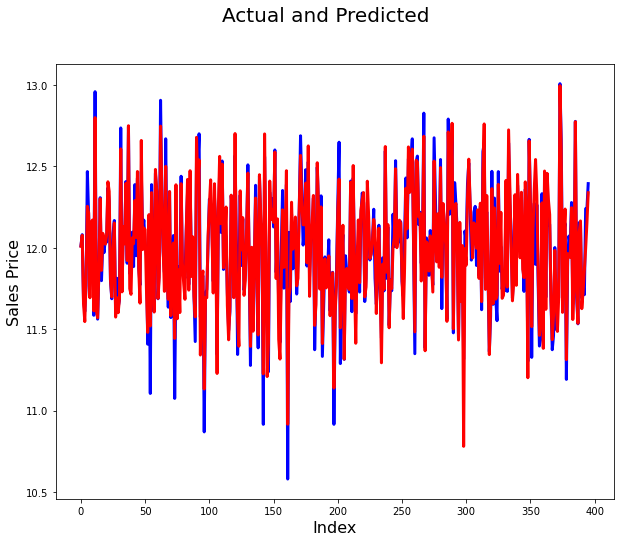

In [366]:
#Ridge visualization for train and test

colz = [i for i in range(0,Y_test.shape[0],1)]

fig = plt.figure(figsize=(10,8))

plt.plot(colz,Y_test,color='blue',linewidth=3.0,linestyle='-')

plt.plot(colz,Y_pred_test,color='red',linewidth=3.0,linestyle='-')

fig.suptitle('Actual and Predicted', fontsize=20)

plt.xlabel('Index', fontsize=16)
plt.ylabel('Sales Price', fontsize=16) 

# Lasso Regression

In [367]:
#Setting Alphas for Lasso
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}


# loading Lasso

lasso = Lasso()

# cross validation with fold 5

folds = 5

lasso_model_cv = GridSearchCV(estimator = lasso, 
                              param_grid = params,
                              cv = folds,
                              scoring = 'neg_mean_absolute_error',
                              return_train_score = True,
                              verbose = 1)

# fitting the lasso model with X_train and y_train
lasso_model_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [368]:
#displaying the mean score of Lasso
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.073439        -0.080822                1
1       0.0002         -0.073481        -0.080841                2
2       0.0003         -0.073534        -0.080872                3
3       0.0004         -0.073601        -0.080906                4
4       0.0005         -0.073688        -0.080964                5
5        0.001         -0.074287        -0.081386                6
6        0.002         -0.075572        -0.081990                7
7        0.003         -0.076538        -0.082247                8
8        0.004         -0.077084        -0.082325                9
9        0.005         -0.077740        -0.082629               10
10        0.01         -0.081721        -0.086193               11

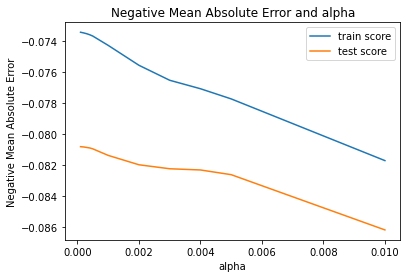

In [369]:
# plotting mean train and test scores with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting the train and test data

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [370]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [371]:
#checking the coefficients with lambda = 0.0001
alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,Y_train)

lasso.coef_

array([ 0.02124706, -0.02275347,  0.07069435,  0.04426728,  0.01955967,
        0.02527988, -0.01527895,  0.05727252,  0.01387257,  0.11719715,
        0.00980285,  0.01239911,  0.01451898,  0.00875855,  0.03324711,
        0.01094333, -0.05489869, -0.01795012, -0.01054127,  0.07260677,
        0.03794931,  0.14862373,  0.11959048,  0.00930383,  0.02310457,
       -0.00900171, -0.00807004, -0.00731048, -0.00566653,  0.01637638,
       -0.0057022 , -0.0053086 ,  0.02100202,  0.01466985, -0.02528617,
       -0.00897095, -0.02430006, -0.00862757, -0.02171309,  0.01129816,
       -0.01457   ,  0.00717191,  0.01317864,  0.01831747,  0.03274057,
        0.01322649,  0.02667863,  0.00692604,  0.01309147,  0.01766199])

In [372]:
# Displaying the Shortlisted Features and Coefficients in a house pricing dataframe

house_price_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_price_lasso = house_price_lasso[house_price_lasso['Coefficient'] != 0.00]
house_price_lasso.reset_index(drop=True, inplace=True)
house_price_lasso

Features  Coefficient
0                LotArea       0.0212
1               BldgType      -0.0228
2            OverallQual       0.0707
3            OverallCond       0.0443
4           BsmtExposure       0.0196
5             BsmtFinSF1       0.0253
6              BsmtUnfSF      -0.0153
7            TotalBsmtSF       0.0573
8              HeatingQC       0.0139
9              GrLivArea       0.1172
10              HalfBath       0.0098
11           KitchenQual       0.0124
12           FireplaceQu       0.0145
13          GarageFinish       0.0088
14            GarageCars       0.0332
15         SaleCondition       0.0109
16      YearBuilt_DayOld      -0.0549
17   YearRemodAdd_DayOld      -0.0180
18    GarageYrBlt_DayOld      -0.0105
19           MSZoning_FV       0.0726
20           MSZoning_RH       0.0379
21           MSZoning_RL       0.1486
22           MSZoning_RM       0.1196
23  Neighborhood_BrkSide       0.0093
24  Neighborhood_Crawfor       0.0231
25  Neighborhood_Edwards      -0.0090
26  Neighborhood_MeadowV      -0.0081
27  Neighborhood_Mitchel      -0.0073
28   Neighborhood_NWAmes      -0.0057
29  Neighborhood_NridgHt       0.0164
30  Neighborhood_OldTown      -0.0057
31   Neighborhood_Sawyer      -0.0053
32  Neighborhood_Somerst       0.0210
33  Neighborhood_StoneBr       0.0147
34       RoofStyle_Gable      -0.0253
35     RoofStyle_Gambrel      -0.0090
36         RoofStyle_Hip      -0.0243
37        RoofStyle_Shed      -0.0086
38   Exterior1st_BrkComm      -0.0217
39   Exterior1st_BrkFace       0.0113
40   Exterior1st_Wd Sdng      -0.0146
41   Exterior2nd_MetalSd       0.0072
42   Exterior2nd_Wd Sdng       0.0132
43     Foundation_CBlock       0.0183
44      Foundation_PConc       0.0327
45       Foundation_Slab       0.0132
46     GarageType_Attchd       0.0267
47    GarageType_Basment       0.0069
48    GarageType_BuiltIn       0.0131
49     GarageType_Detchd       0.0177

In [373]:
# Adding the lasso features and coefficients in dictionary for graphing purpose

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.02124706312726019,
 'BldgType': -0.022753470632739053,
 'OverallQual': 0.07069435463211907,
 'OverallCond': 0.04426727952994645,
 'BsmtExposure': 0.019559674870502915,
 'BsmtFinSF1': 0.02527988348520987,
 'BsmtUnfSF': -0.015278948362197568,
 'TotalBsmtSF': 0.057272516253957344,
 'HeatingQC': 0.013872568204522925,
 'GrLivArea': 0.11719715254062951,
 'HalfBath': 0.009802852265549057,
 'KitchenQual': 0.01239911377734497,
 'FireplaceQu': 0.014518977942561823,
 'GarageFinish': 0.008758554833890292,
 'GarageCars': 0.03324710737899039,
 'SaleCondition': 0.010943334717418615,
 'YearBuilt_DayOld': -0.05489868892824188,
 'YearRemodAdd_DayOld': -0.01795011812614861,
 'GarageYrBlt_DayOld': -0.010541267100146799,
 'MSZoning_FV': 0.07260676949243172,
 'MSZoning_RH': 0.03794931012827508,
 'MSZoning_RL': 0.1486237313683193,
 'MSZoning_RM': 0.11959048356157208,
 'Neighborhood_BrkSide': 0.00930383468110484,
 'Neighborhood_Crawfor': 0.023104572146999718,
 'Neighborhood_Edwards': -0.00900171

In [374]:
# Doing the RFE to minimise the features to 15 for Lasso
X_train_lasso = X_train[house_price_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, Y_train)

# running RFE for Lasso
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, Y_train)

In [375]:
def lasso_find_coefficient(x):
    return lasso_coeff_dict[x]

# Assign top 15 features to a temp dataframe for further display in the bar plot

house_price_lasso = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
house_price_lasso = house_price_lasso.loc[house_price_lasso['rfe_support'] == True]
house_price_lasso.reset_index(drop=True, inplace=True)

house_price_lasso['Coefficient'] = house_price_lasso['Features'].apply(lasso_find_coefficient)
house_price_lasso = house_price_lasso.sort_values(by=['Coefficient'], ascending=False)
house_price_lasso = house_price_lasso.head(15)
house_price_lasso

Features  rfe_support  rfe_ranking  Coefficient
10           MSZoning_RL         True            1     0.148624
11           MSZoning_RM         True            1     0.119590
5              GrLivArea         True            1     0.117197
8            MSZoning_FV         True            1     0.072607
1            OverallQual         True            1     0.070694
4            TotalBsmtSF         True            1     0.057273
2            OverallCond         True            1     0.044267
9            MSZoning_RH         True            1     0.037949
6             GarageCars         True            1     0.033247
14      Foundation_PConc         True            1     0.032741
12  Neighborhood_Crawfor         True            1     0.023105
3              BsmtUnfSF         True            1    -0.015279
13   Exterior1st_BrkComm         True            1    -0.021713
0               BldgType         True            1    -0.022753
7       YearBuilt_DayOld         True            1    -0.054899

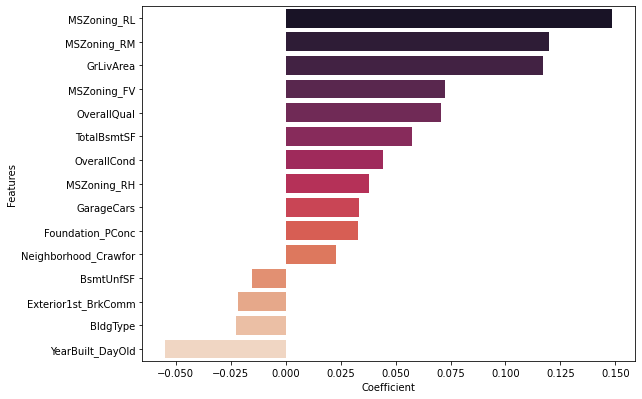

In [376]:
# Plotting the blot plot to determine the variables that would affect pricing of the house based on Lasso Regression

plt.figure(figsize = (30,30))

plt.subplot(4,3,1)

sns.barplot(x='Coefficient' , y = 'Features' , palette='rocket',data = house_price_lasso)

plt.show()


In [378]:
# Predicting the X train and X test in lasso

Y_pred_train = lasso.predict(X_train)
Y_pred_test = lasso.predict(X_test)

house_price_lasso_metric = []

# calculating r2 square in Train and Test for Lasso Regression
print("R2 Square - Lasso Regression")
r2_train_lasso = r2_score(Y_train, Y_pred_train)
print("Train : ",r2_train_lasso)
house_price_lasso_metric.append(r2_train_lasso)

r2_test_lasso = r2_score(Y_test, Y_pred_test)
print("Test : ",r2_test_lasso)
house_price_lasso_metric.append(r2_test_lasso)

print( )

#Calculating Residual Sum Of Square (RSS) of Train and Test for Lasso Regression

print("Residual Sum Of Square (RSS) - Lasso Regression")
rss_train_lasso = np.sum(np.square(Y_train - Y_pred_train))
print("Train : ",rss_train_lasso)
house_price_lasso_metric.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(Y_test - Y_pred_test))
print("Test : ",rss_test_lasso)
house_price_lasso_metric.append(rss_test_lasso)

print( )

# Calculating Mean Squared Error(MSE) of Train and Test for Lasso Regression

print("Mean Squared Error (MSE) - Lasso Regression")
mse_train_lasso = mean_squared_error(Y_train, Y_pred_train)
print("Train : ",mse_train_lasso)
house_price_lasso_metric.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(Y_test, Y_pred_test)
print("Test : ",mse_test_lasso)
house_price_lasso_metric.append(mse_test_lasso)

R2 Square - Lasso Regression
Train :  0.9190726620310575
Test :  0.9010805384474538

Residual Sum Of Square (RSS) - Lasso Regression
Train :  9.899060819830737
Test :  5.392357705919927

Mean Squared Error (MSE) - Lasso Regression
Train :  0.01074816592815498
Test :  0.013617064913939209


Text(0, 0.5, 'Sales Price')

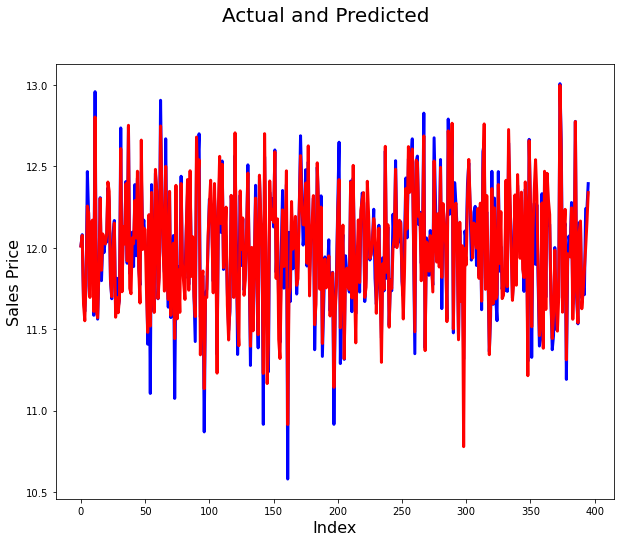

In [379]:

colz = [i for i in range(0,Y_test.shape[0],1)]
fig = plt.figure(figsize=(10,8))

plt.plot(colz,Y_test,color='blue',linewidth=3.0,linestyle='-')

plt.plot(colz,Y_pred_test,color='red',linewidth=3.0,linestyle='-')

fig.suptitle('Actual and Predicted', fontsize=20)

plt.xlabel('Index', fontsize=16)
plt.ylabel('Sales Price', fontsize=16) 

In [380]:
# Comparing the R2,RSS,MSE of Linear,Ridge and Lasso Regression

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                      'MSE (Train)','MSE (Test)'], 
            'Linear Regression' : house_price_lr_metric
        }
print(len(house_price_lr_metric))

print(len(house_price_ridge_metric))

print(len(house_price_lasso_metric))
      
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(house_price_ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(house_price_lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

6
6
6


Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.920350          0.918875          0.919073
1   R2 Score (Test)           0.896958          0.901501          0.901081
2       RSS (Train)           9.742848          9.923284          9.899061
3        RSS (Test)           5.617075          5.369445          5.392358
4       MSE (Train)           0.102852          0.010774          0.010748
5        MSE (Test)           0.119099          0.013559          0.013617

In [381]:
X_train.columns

Index(['LotArea', 'BldgType', 'OverallQual', 'OverallCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'HalfBath', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'SaleCondition', 'YearBuilt_DayOld', 'YearRemodAdd_DayOld',
       'GarageYrBlt_DayOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'GarageType_Attchd', 'GarageType_Basmen

In [382]:
house_price_coeff_check = pd.DataFrame(index=X_train.columns)
house_price_coeff_check .shape

(50, 0)

In [383]:
# declaring columns

house_price_coeff_check['Linear'] = lm.coef_
house_price_coeff_check['Ridge'] = ridge.coef_
house_price_coeff_check['Lasso'] = lasso.coef_

In [384]:
# Displaying the coefficients
pd.set_option('display.max_rows', None)
house_price_coeff_check.head(50)

Linear     Ridge     Lasso
LotArea               0.021340  0.021419  0.021247
BldgType             -0.023068 -0.022338 -0.022753
OverallQual           0.070365  0.071099  0.070694
OverallCond           0.044073  0.044723  0.044267
BsmtExposure          0.019673  0.019325  0.019560
BsmtFinSF1            0.025007  0.025575  0.025280
BsmtUnfSF            -0.015640 -0.015064 -0.015279
TotalBsmtSF           0.057756  0.057465  0.057273
HeatingQC             0.013881  0.013958  0.013873
GrLivArea             0.117236  0.116166  0.117197
HalfBath              0.009901  0.010381  0.009803
KitchenQual           0.012338  0.012853  0.012399
FireplaceQu           0.014511  0.014795  0.014519
GarageFinish          0.008560  0.008582  0.008759
GarageCars            0.032825  0.032600  0.033247
SaleCondition         0.010838  0.011409  0.010943
YearBuilt_DayOld     -0.054039 -0.055037 -0.054899
YearRemodAdd_DayOld  -0.018154 -0.017998 -0.017950
GarageYrBlt_DayOld   -0.011245 -0.010693 -0.010541
MSZoning_FV           0.075537  0.062276  0.072607
MSZoning_RH           0.039686  0.033197  0.037949
MSZoning_RL           0.154370  0.129330  0.148624
MSZoning_RM           0.124993  0.102270  0.119590
Neighborhood_BrkSide  0.009458  0.009889  0.009304
Neighborhood_Crawfor  0.023212  0.023399  0.023105
Neighborhood_Edwards -0.009187 -0.008577 -0.009002
Neighborhood_MeadowV -0.008133 -0.008084 -0.008070
Neighborhood_Mitchel -0.007472 -0.007265 -0.007310
Neighborhood_NWAmes  -0.005878 -0.005599 -0.005667
Neighborhood_NridgHt  0.016609  0.016278  0.016376
Neighborhood_OldTown -0.006007 -0.005019 -0.005702
Neighborhood_Sawyer  -0.005499 -0.005197 -0.005309
Neighborhood_Somerst  0.021138  0.021558  0.021002
Neighborhood_StoneBr  0.014882  0.014656  0.014670
RoofStyle_Gable      -0.029724 -0.025556 -0.025286
RoofStyle_Gambrel    -0.009916 -0.009662 -0.008971
RoofStyle_Hip        -0.028532 -0.024855 -0.024300
RoofStyle_Shed       -0.009209 -0.008786 -0.008628
Exterior1st_BrkComm  -0.021876 -0.021686 -0.021713
Exterior1st_BrkFace   0.011412  0.011099  0.011298
Exterior1st_Wd Sdng  -0.015232 -0.014747 -0.014570
Exterior2nd_MetalSd   0.007434  0.006850  0.007172
Exterior2nd_Wd Sdng   0.013764  0.013423  0.013179
Foundation_CBlock     0.019382  0.018362  0.018317
Foundation_PConc      0.033807  0.032804  0.032741
Foundation_Slab       0.013687  0.013705  0.013226
GarageType_Attchd     0.028502  0.028201  0.026679
GarageType_Basment    0.007596  0.006994  0.006926
GarageType_BuiltIn    0.014022  0.013989  0.013091
GarageType_Detchd     0.019329  0.018796  0.017662

In [386]:
print(mean_squared_error(Y_test, ridge.predict(X_test)))

print(mean_squared_error(Y_test, lasso.predict(X_test)))

0.013559203675525747
0.013617064913939209


# Conclusion

In [387]:
As the model accuracy on test and train set for all three models are similar, 
Simple Linear Regression model is fairly complex, 
Ridge Regression model is complex too, so we would not consider both.

The optimal lambda value in case of Ridge and Lasso is as below:

Ridge : 4
Lasso : 0.0001

The Mean Squared error in case of Ridge and Lasso are:

Ridge : 0.013777
Lasso : 0.013823

Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Below are the variables which has impact on Sales Pricing:

MSZoning_RL
MSZoning_RM
GrLivArea
MSZoning_FV
OverallQual
TotalBsmtSF
OverallCond
MSZoning_RH
Foundation_PConc
GarageCars

SyntaxError: invalid syntax (<ipython-input-387-368377f24610>, line 1)